# Projecto de ML
O projecto consiste em três fases:
- Exploratory Data Analysis
- Modelling
- Evaluation

1. Da Exploratory Data Analysis resultará um dataframe (df_orto_cleaned), que terá todos os missings tratados e terá unicamente as colunas consideradas relavantes após EDA.

2. Caso os dados estejam desbalanceados serão criados 2 dataframes para cada um dos metodos de balanceamento dados em aula, Undersampling (df_orto_under) e Oversampling (df_orto_over)

3. Todos os modelos de treino escolhidos serão executados para os 3 dataframes: df_orto_cleaned, df_orto_under e df_orto_over.
    1. Os modelos dados em aula foram: Decision Tree, Regressão Logística e Random Forest
    
    2. Em cada modelo será treinado com dois datasets de treino: split 70/30 e cross-validation

4. Todos os modelos resultantes terão se ser avaliados através das suas confusion matrix (conf_mtx_modelname_dfName_methodName)

In [1]:
import os
# preparação do ambiente de trabalho
print(os.getcwd())
os.chdir(os.path.dirname(os.getcwd())) #
print(os.getcwd())

c:\Users\raque\OneDrive\Desktop\PG HDS\Aulas - 3º Trimestre\Machine Learning\Projeto_ML\Projeto_final_Entregaveis\Proj-Notebooks
c:\Users\raque\OneDrive\Desktop\PG HDS\Aulas - 3º Trimestre\Machine Learning\Projeto_ML\Projeto_final_Entregaveis


# Exploratory Data Analysis (EDA)
Aqui iremos:

1. Importar o excel para o df_orto
2. Validar dimensões e dados importados
3. Criar coluna Target e validar a sua distibuição
4. Transformar todas a variáveis em valores numéricos (Duvida: Será que se deve passar o sexo de 1 ou 2 para 0 ou 1?)
5. Validar a existencia de duplicados e remove-los
6. Validar se alterou a distribuição da target
7. Validar a existência de missings e tratá-los
8. Validar a variancia das variáveis e eliminar variáveis com 99% de resultados iguais
9. Verificar a existencia e tratar outliers (eliminação IQR ou substituição pelos limites)
10. Analise univariada
11. Analise bi variada
12. Analise multivariada - correlação (remover variaveis correlacionadas, se for necessário)
13. Output (df_orto_cleaned)



## 1. Importar o excel para o df_orto

In [2]:
import pandas as pd
import seaborn as sns 

df_orto = pd.read_excel('ML_Ortopedia_CPAK.xlsx')

## 2. Validar dimensões e dados importados

In [3]:
#2. Validar dimensões e dados importados
#Ver a dimensão do dataset
print('df_orto.shape:',df_orto.shape)

#Print das primeiras 15 linhas do dataframe
print('df_orto.head(15):')
df_orto.head(15)

df_orto.shape: (265, 22)
df_orto.head(15):


,Idade,Sexo,Peso,Altura_cm,IMC,Grupo_pre,Grupo_pos,Fle_0,EVA_0,PM6_0,...,WAtotal_0,WT_0,Fle_90,EVA_90,PM6_90,WD_90,WR_90,WAtotal_90,WT_90,Satisfação
0,67,1,80,158,32.046146,5.0,5,86,4,324,...,54,75,80,1,290,5,1,9,15,8
1,76,2,60,155,24.973985,5.0,5,90,4,357,...,39,60,110,1,480,5,4,3,12,9
2,72,2,93,182,28.076319,1.0,1,45,10,289,...,53,72,100,0,388,0,0,0,0,10
3,67,2,71,163,26.722873,6.0,6,127,2,390,...,16,18,100,0,387,2,0,10,12,9
4,66,1,49,160,19.140625,6.0,6,120,0,285,...,8,8,125,1,284,0,1,2,3,7
5,81,2,66,160,25.781250,4.0,4,82,4,135,...,26,38,85,1,242,2,1,6,9,9
6,72,1,63,162,24.005487,3.0,3,95,1,366,...,0,18,100,1,392,4,0,7,11,8
7,76,1,56,148,25.566107,6.0,6,65,9,249,...,43,63,75,1,262,2,1,7,10,7
8,81,1,81,162,30.864198,3.0,3,80,2,180,...,55,73,70,2,190,1,1,11,13,9
9,73,1,80,170,27.681661,5.0,5,95,0,501,...,44,59,114,0,424,0,0,2,2,9


In [4]:
#Print das últimas 15 linhas do dataframe
df_orto.tail(15)

,Idade,Sexo,Peso,Altura_cm,IMC,Grupo_pre,Grupo_pos,Fle_0,EVA_0,PM6_0,...,WAtotal_0,WT_0,Fle_90,EVA_90,PM6_90,WD_90,WR_90,WAtotal_90,WT_90,Satisfação
250,63,1,69,163,25.970116,5.0,2,105,8,260,...,52,74,128,7,332,4,2,14,20,9
251,82,1,56,149,25.224089,5.0,2,110,8,240,...,43,54,100,8,180,7,1,17,25,10
252,65,1,68,151,29.823253,2.0,2,120,4,220,...,37,52,108,0,330,2,1,10,13,10
253,52,1,58,140,29.591837,3.0,3,105,3,220,...,36,54,125,4,300,4,0,5,9,8
254,47,2,92,180,28.395062,5.0,5,120,3,360,...,20,30,85,1,340,1,2,5,8,8
255,75,1,70,162,26.672763,5.0,5,85,8,999,...,50,73,95,7,320,5,3,10,18,7
256,87,1,70,160,27.343750,5.0,5,90,6,240,...,32,48,135,0,180,2,0,17,19,8
257,74,1,57,155,23.725286,5.0,3,110,3,450,...,21,32,99,4,275,6,3,14,23,6
258,73,2,86,175,28.081633,2.0,2,150,4,370,...,16,30,121,1,505,2,1,2,5,10
259,67,1,76,160,29.687500,NaN,2,150,3,480,...,23,36,123,0,460,0,6,12,18,9


In [5]:
#Ver os tipos de variáveis
df_orto.dtypes

Idade           int64
Sexo            int64
Peso            int64
Altura_cm       int64
IMC           float64
Grupo_pre     float64
Grupo_pos       int64
Fle_0           int64
EVA_0           int64
PM6_0           int64
WD_0            int64
WR_0            int64
WAtotal_0       int64
WT_0            int64
Fle_90          int64
EVA_90          int64
PM6_90          int64
WD_90           int64
WR_90           int64
WAtotal_90      int64
WT_90           int64
Satisfação      int64
dtype: object

## 3. Criar coluna Target e validar a sua distibuição

In [6]:
import numpy as np
df_orto['target'] = np.where(df_orto['Grupo_pos']==df_orto['Grupo_pre'], 0, 1) 
#Colocar coluna target no inicio e eliminar colunas que deram origem à target
df_orto = df_orto[['target'] +[c for c in df_orto if c not in ['target','Grupo_pos','Fle_90','EVA_90','PM6_90','WD_90','WR_90','WAtotal_90','WT_90','Satisfação']]]
df_orto.tail()

#justificar relatório

,target,Idade,Sexo,Peso,Altura_cm,IMC,Grupo_pre,Fle_0,EVA_0,PM6_0,WD_0,WR_0,WAtotal_0,WT_0
260,1,73,1,71,153,30.330215,NaN,92,8,220,11,5,41,57
261,1,77,2,63,161,24.304618,NaN,130,7,160,13,2,44,59
262,0,76,1,65,155,27.055151,6.0,80,9,60,15,7,46,68
263,0,70,1,54,169,18.906901,4.0,95,7,420,7,3,24,34
264,0,79,2,92,182,27.774423,5.0,130,6,320,14,0,24,38


df_orto['target'].value_counts():
target
0    236
1     29
Name: count, dtype: int64
df_orto['target'].value_counts(normalize=True):
target
0    0.890566
1    0.109434
Name: proportion, dtype: float64


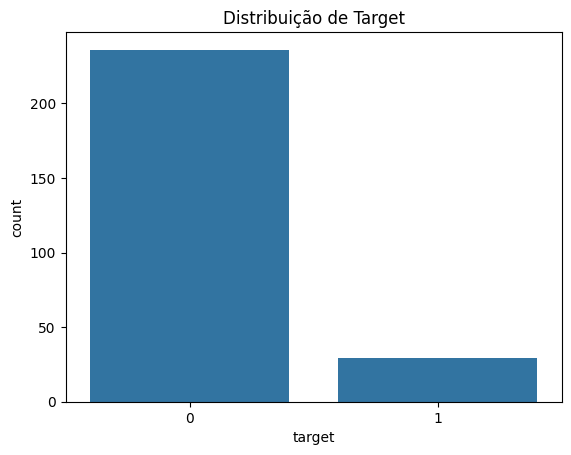

In [7]:
#Quantas observações temos por cada valor da target?
print("df_orto['target'].value_counts():")
print(df_orto['target'].value_counts())

#Qual a distribuição da target?
print("df_orto['target'].value_counts(normalize=True):")
print(df_orto['target'].value_counts(normalize=True))

# Criar um countplot para ver a distribuição da target

import matplotlib.pyplot as plt
import seaborn as sns 

sns.countplot(x='target', data=df_orto)

plt.title("Distribuição de Target")
plt.xlabel('target')
plt.ylabel('count')
plt.show()


## 4. Transformar todas a variáveis em valores numéricos

In [8]:
#validar quais as variáveis que não são numéricas
df_orto.dtypes

target         int32
Idade          int64
Sexo           int64
Peso           int64
Altura_cm      int64
IMC          float64
Grupo_pre    float64
Fle_0          int64
EVA_0          int64
PM6_0          int64
WD_0           int64
WR_0           int64
WAtotal_0      int64
WT_0           int64
dtype: object

In [9]:
#Todas as variáveis são numéricas não há necessidade de fazer a transformação

## 5. Validar a existencia de duplicados e remove-los

In [10]:
#Ver se existem linhas duplicadas
print(f"Existem {df_orto.duplicated().sum()} duplicados")
df_orto[df_orto.duplicated()]

Existem 0 duplicados


,target,Idade,Sexo,Peso,Altura_cm,IMC,Grupo_pre,Fle_0,EVA_0,PM6_0,WD_0,WR_0,WAtotal_0,WT_0


In [11]:
#Não existem duplicados pelo que não há necessidade de eliminação

## 6. Validar se alterou a distribuição da target (skipped, não há duplicados)

## 7. Validar a existência de missings e tratá-los

In [12]:
#ver quantos missings existem
df_orto.isnull().sum()

target       0
Idade        0
Sexo         0
Peso         0
Altura_cm    0
IMC          0
Grupo_pre    3
Fle_0        0
EVA_0        0
PM6_0        0
WD_0         0
WR_0         0
WAtotal_0    0
WT_0         0
dtype: int64

In [13]:
# Embora não sejam reportados missings pelo pandas, sabemos de antemão que os missings estão a ser representados por 999
# Será feito um replace de 999 por NaN e validado novamente
# Como 999 não tem significado para nenhuma das colunas será aplicado o replace em todo o dataframe

df_orto=df_orto.replace({999:np.NaN})

#ver quantos missings existem
df_orto.isnull().sum()

target       0
Idade        0
Sexo         0
Peso         2
Altura_cm    2
IMC          2
Grupo_pre    3
Fle_0        3
EVA_0        6
PM6_0        3
WD_0         0
WR_0         0
WAtotal_0    1
WT_0         0
dtype: int64

In [14]:
#Calcular a percentagem de missings de todas as variáveis 
df_orto.isnull().sum()/len(df_orto)*100

target       0.000000
Idade        0.000000
Sexo         0.000000
Peso         0.754717
Altura_cm    0.754717
IMC          0.754717
Grupo_pre    1.132075
Fle_0        1.132075
EVA_0        2.264151
PM6_0        1.132075
WD_0         0.000000
WR_0         0.000000
WAtotal_0    0.377358
WT_0         0.000000
dtype: float64

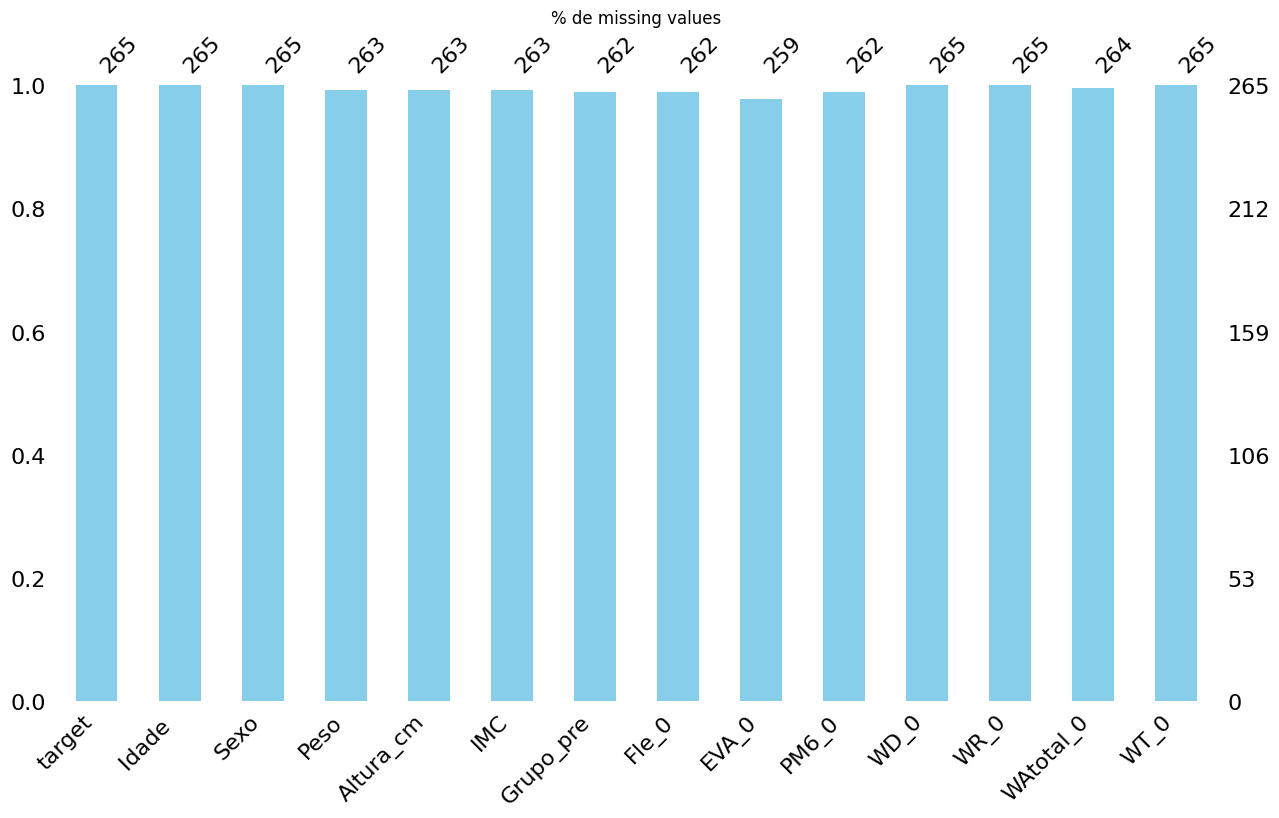

<Axes: >

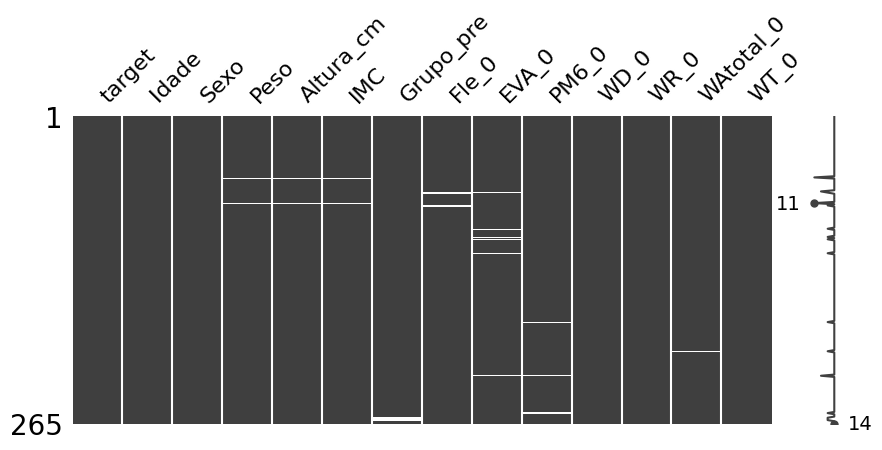

In [15]:
# Visualização dos missings
import missingno as msno

msno.bar(df_orto, figsize=(15,8), color='skyblue')
plt.title("% de missing values")
plt.show()

msno.matrix(df_orto, figsize=(10,4))

In [16]:
#Tendo em conta a baixa existência de missings em cada coluna não há necessidade de remover colunas

lst_missing=pd.DataFrame(df_orto.apply(lambda x: x.isnull().sum(), axis=0)/len(df_orto))
lst_missing=lst_missing.rename(columns={0:"Missing (%)"})
lst_missing=lst_missing.reset_index()
lst_missing=lst_missing.rename(columns={'index':'Variable'})
lst_missing=lst_missing[lst_missing['Missing (%)'] > 0]
lst_missing

print('Variáveis com missings')
lst_missing


Variáveis com missings


,Variable,Missing (%)
3,Peso,0.007547
4,Altura_cm,0.007547
5,IMC,0.007547
6,Grupo_pre,0.011321
7,Fle_0,0.011321
8,EVA_0,0.022642
9,PM6_0,0.011321
12,WAtotal_0,0.003774


In [17]:
import pandas as pd

# Definição das listas de tipos de variáveis
#variaveis_ordinais = ['Satisfação', 'EVA_0', 'EVA_90']
#variaveis_continuas = ['Peso', 'Altura_cm', 'IMC', 'PM6_0', 'PM6_90', 'Fle_0', 'Fle_90']
#variaveis_categoricas = ['Sexo']
#variaveis_discretas = ['WAtotal_0', 'WAtotal_90', 'WD_0', 'WD_90', 'WR_0', 'WR_90', 'Idade ']

variaveis_ordinais = ['EVA_0']
variaveis_continuas = ['Peso', 'Altura_cm', 'IMC', 'PM6_0', 'Fle_0']
variaveis_categoricas = ['Sexo','Grupo_pre']
variaveis_discretas = ['WAtotal_0', 'WD_0', 'WR_0', 'Idade ']

for var in lst_missing['Variable']:
    if var in variaveis_continuas:
        df_orto[var] = df_orto[var].fillna(df_orto[var].mean())
    elif var in variaveis_ordinais:
        moda = df_orto[var].mode().iloc[0]  # Encontra a moda
        df_orto[var] = df_orto[var].fillna(moda)  # Imputa a moda
        df_orto[var] = df_orto[var].astype(int)  # Converte para int e mantém como int
    elif var in variaveis_categoricas:
        df_orto[var] = df_orto[var].fillna(df_orto[var].mode().iloc[0])
    elif var in variaveis_discretas:
        df_orto[var] = df_orto[var].fillna(df_orto[var].median())

print("Variáveis ordinais:", variaveis_ordinais)
print("Variáveis contínuas:", variaveis_continuas)
print("Variáveis categóricas:", variaveis_categoricas)
print("Variáveis discretas:", variaveis_discretas)


Variáveis ordinais: ['EVA_0']
Variáveis contínuas: ['Peso', 'Altura_cm', 'IMC', 'PM6_0', 'Fle_0']
Variáveis categóricas: ['Sexo', 'Grupo_pre']
Variáveis discretas: ['WAtotal_0', 'WD_0', 'WR_0', 'Idade ']


In [18]:
print(df_orto.isnull().sum())

target       0
Idade        0
Sexo         0
Peso         0
Altura_cm    0
IMC          0
Grupo_pre    0
Fle_0        0
EVA_0        0
PM6_0        0
WD_0         0
WR_0         0
WAtotal_0    0
WT_0         0
dtype: int64


In [19]:
# Validar que todas as variáveis estão com os tipos certos
df_orto.dtypes

target         int32
Idade          int64
Sexo           int64
Peso         float64
Altura_cm    float64
IMC          float64
Grupo_pre    float64
Fle_0        float64
EVA_0          int32
PM6_0        float64
WD_0           int64
WR_0           int64
WAtotal_0    float64
WT_0           int64
dtype: object

## 8. Validar a variancia das variáveis e eliminar variáveis com 99% de resultados iguais

In [20]:
#Quanto maior, mais disperso estão os dados
# Calcular a variância
variance = df_orto.var()

# Converter a série num DataFrame e dar um nome à coluna
variance_df = variance.reset_index()
variance_df.columns = ['Variável', 'Variância']
# Ordenar o DataFrame pela variância, do maior para o menor
variance_df = variance_df.sort_values(by='Variância', ascending=False)

# Ver o DataFrame
variance_df
###ATT à análise das variáveis ordinais. 

,Variável,Variância
9,PM6_0,10905.320900
7,Fle_0,495.141164
13,WT_0,254.557662
3,Peso,222.312190
12,WAtotal_0,151.963551
4,Altura_cm,105.913181
1,Idade,58.194168
5,IMC,20.270454
10,WD_0,11.994511
11,WR_0,7.482333


In [21]:
#Obter uma lista com as variáveis com mais de 99% de valores iguais
variable = []
columns= df_orto.columns

for i in range(0, len(variance)):
    if variance[i]<=0.01: #variancia inferior a 0.01 = 99% dos dados iguais
        variable.append(columns[i])

print(f"As variáveis com 99% de valores iguais são: {variable}")

As variáveis com 99% de valores iguais são: []


C:\Users\raque\AppData\Local\Temp\ipykernel_19156\3658803633.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if variance[i]<=0.01: #variancia inferior a 0.01 = 99% dos dados iguais


In [22]:
#Não existem variáveis com 99% dos dados iguais, alias como já era de esperar pelos resultados da variancia. Não existe necessidade de eliminar variáveis

## 9. Verificar a existencia e tratar outliers (eliminação IQR ou substituição pelos limites)

In [23]:
# A verificação de outliers só pode ser feita em variáveis quantitativas e variáveis ordinais portanto começamos por seleciona-las
var_num = variaveis_continuas + variaveis_discretas + variaveis_ordinais


In [24]:

#var_num = [f for f in df_orto.columns if df_orto.dtypes[f] == 'float']
#var_num

In [25]:
# Validar que está tudo correcto no sub dataframe
df_orto[var_num]

,Peso,Altura_cm,IMC,PM6_0,Fle_0,WAtotal_0,WD_0,WR_0,Idade,EVA_0
0,80.0,158.0,32.046146,324.0,86.0,54.0,15,6,67,4
1,60.0,155.0,24.973985,357.0,90.0,39.0,14,7,76,4
2,93.0,182.0,28.076319,289.0,45.0,53.0,15,4,72,10
3,71.0,163.0,26.722873,390.0,127.0,16.0,1,1,67,2
4,49.0,160.0,19.140625,285.0,120.0,8.0,0,0,66,0
...,...,...,...,...,...,...,...,...,...,...
260,71.0,153.0,30.330215,220.0,92.0,41.0,11,5,73,8
261,63.0,161.0,24.304618,160.0,130.0,44.0,13,2,77,7
262,65.0,155.0,27.055151,60.0,80.0,46.0,15,7,76,9
263,54.0,169.0,18.906901,420.0,95.0,24.0,7,3,70,7


In [26]:
var_int_save = [f for f in df_orto.columns if df_orto.dtypes[f] == 'int64']
df_orto.dtypes



target         int32
Idade          int64
Sexo           int64
Peso         float64
Altura_cm    float64
IMC          float64
Grupo_pre    float64
Fle_0        float64
EVA_0          int32
PM6_0        float64
WD_0           int64
WR_0           int64
WAtotal_0    float64
WT_0           int64
dtype: object

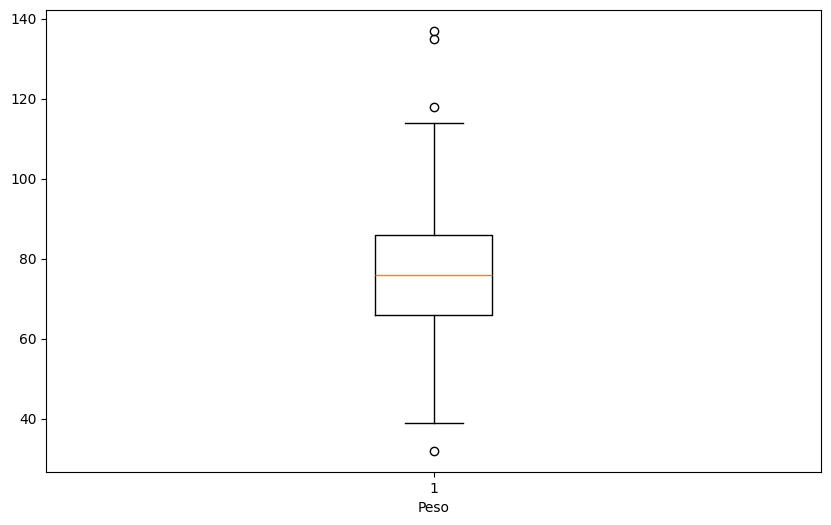

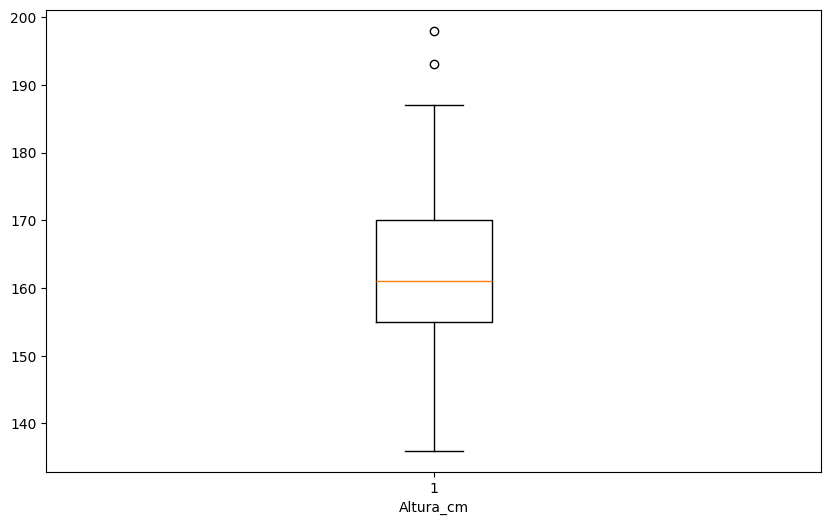

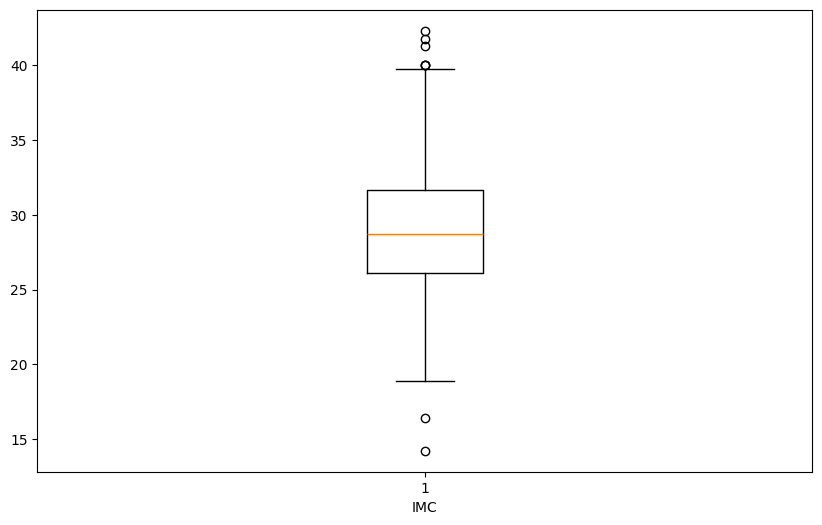

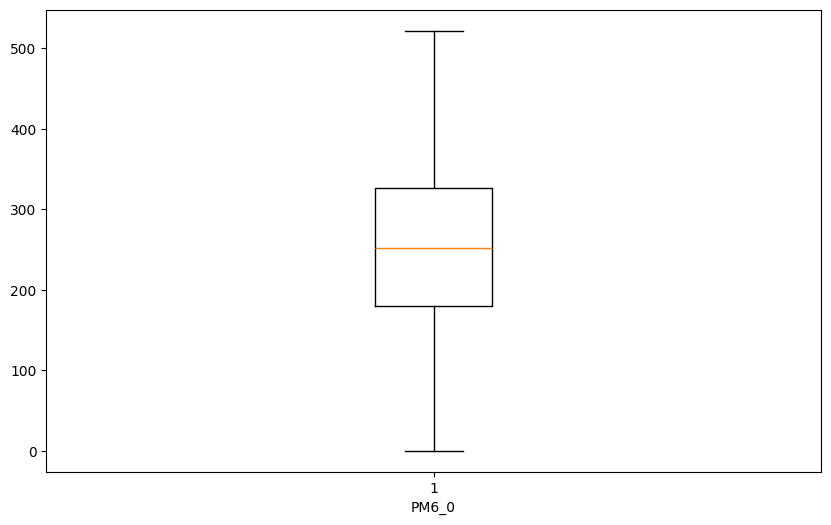

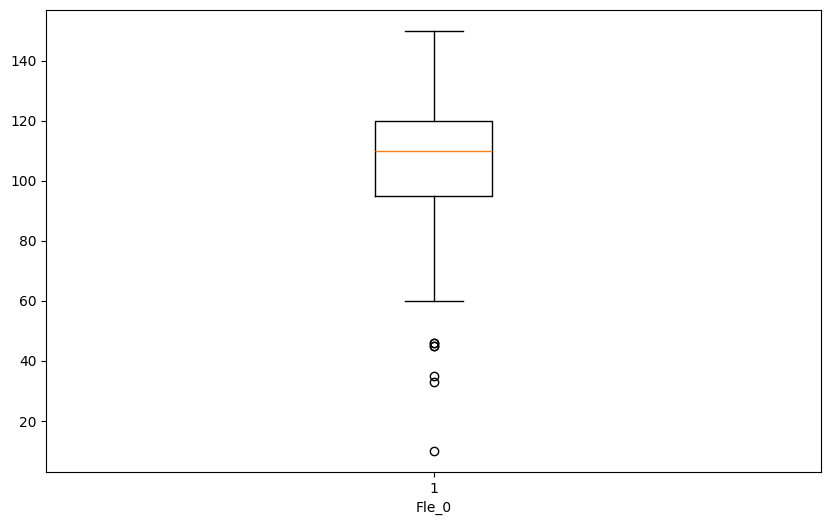

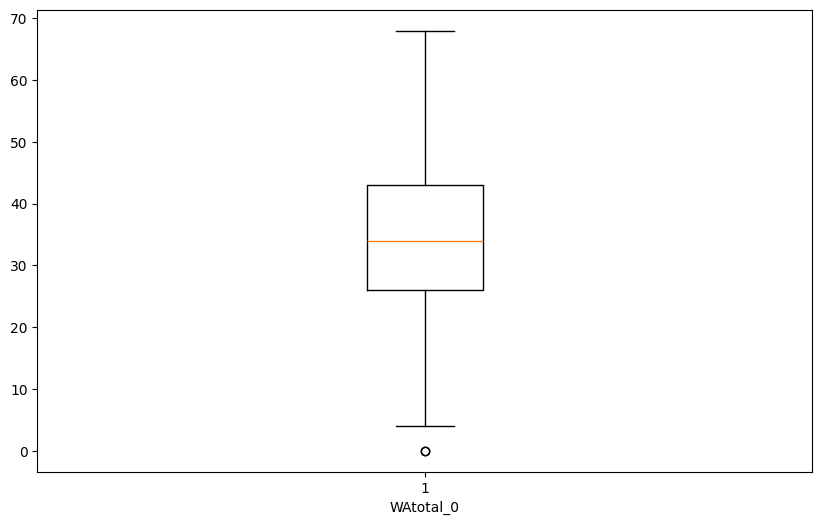

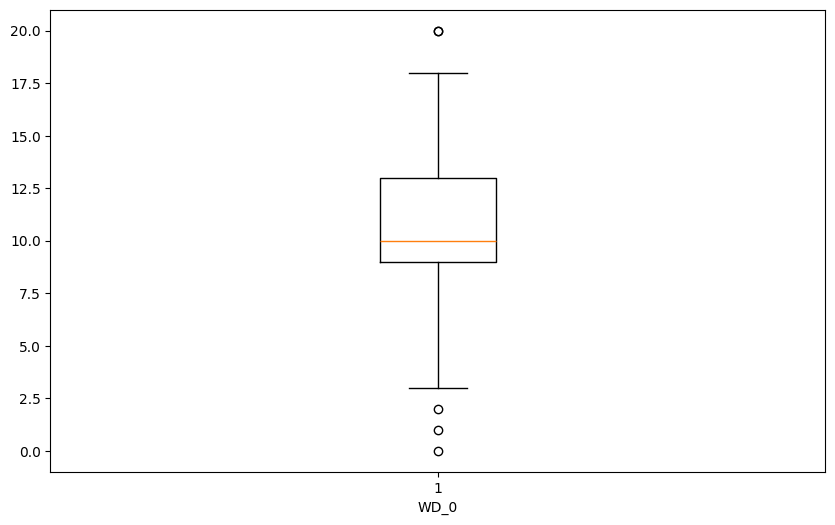

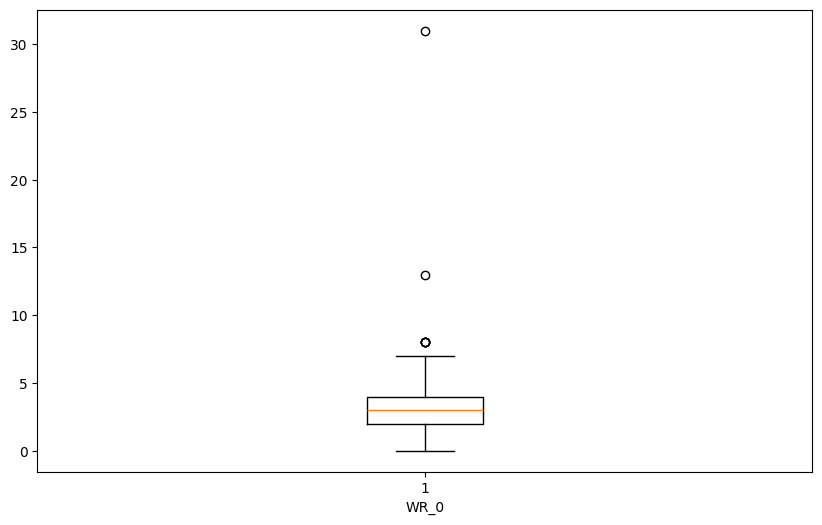

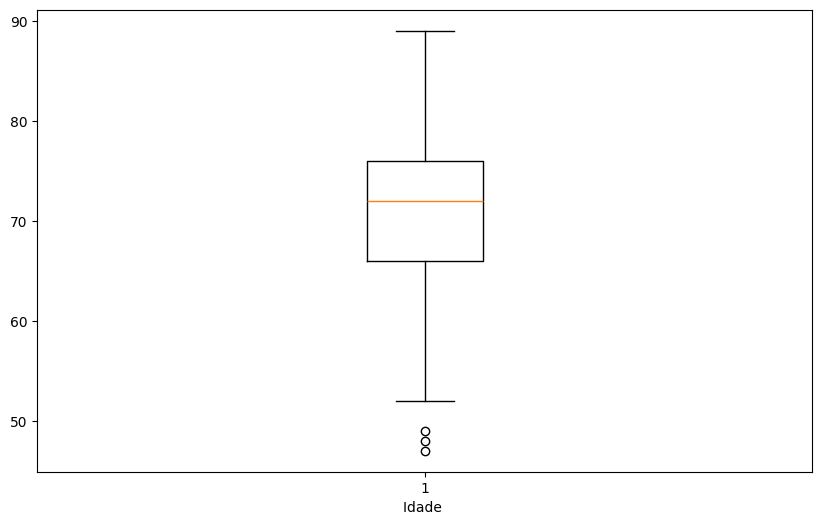

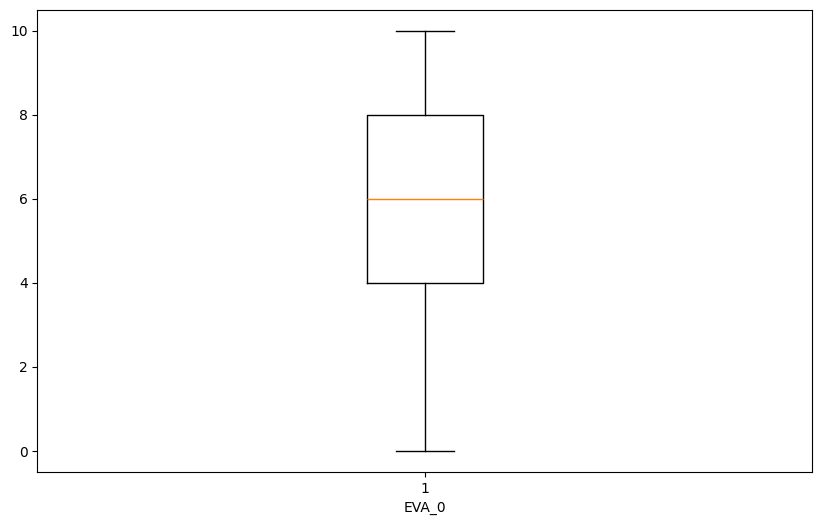

In [27]:
# desenhar boxplots para verificação visual dos outliers
for col in df_orto[var_num].columns:
    plt.figure(figsize=(10,6)) #indicar o tamanho do gráfico
    plt.boxplot(df_orto[col])
    plt.xlabel(col) 

In [28]:
df_orto[var_num].describe()

,Peso,Altura_cm,IMC,PM6_0,Fle_0,WAtotal_0,WD_0,WR_0,Idade,EVA_0
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.00000,265.000000
mean,77.258555,162.600760,29.149885,255.603053,106.839695,34.867925,10.743396,3.079245,71.14717,5.618868
std,14.910137,10.291413,4.502272,104.428544,22.251768,12.327350,3.463309,2.735385,7.62851,2.385647
min,32.000000,136.000000,14.222222,0.000000,10.000000,0.000000,0.000000,0.000000,47.00000,0.000000
25%,66.000000,155.000000,26.122449,180.000000,95.000000,26.000000,9.000000,2.000000,66.00000,4.000000
50%,76.000000,161.000000,28.731747,252.000000,110.000000,34.000000,10.000000,3.000000,72.00000,6.000000
75%,86.000000,170.000000,31.644318,326.000000,120.000000,43.000000,13.000000,4.000000,76.00000,8.000000
max,137.000000,198.000000,42.324275,522.000000,150.000000,68.000000,20.000000,31.000000,89.00000,10.000000


In [29]:
import numpy as np

#calcular os valores para o interquartile range
for col in df_orto[var_num]:
    q1=np.percentile(df_orto[col],25)
    q3=np.percentile(df_orto[col],75)
    iqr=q3-q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr

    print(f"Para a variável {col} o Q1 é {q1}, o Q3 é {q3}, o interquartile range é {iqr}, o limite inferior é {lower_limit} e o superior é {upper_limit}")

    print(f"Outliers abaixo do limite inferior: {(df_orto[col]< lower_limit).sum()}")

    print(f"Outliers abaixo do limite superior: {(df_orto[col]> upper_limit).sum()}")

Para a variável Peso o Q1 é 66.0, o Q3 é 86.0, o interquartile range é 20.0, o limite inferior é 36.0 e o superior é 116.0
Outliers abaixo do limite inferior: 1
Outliers abaixo do limite superior: 3
Para a variável Altura_cm o Q1 é 155.0, o Q3 é 170.0, o interquartile range é 15.0, o limite inferior é 132.5 e o superior é 192.5
Outliers abaixo do limite inferior: 0
Outliers abaixo do limite superior: 2
Para a variável IMC o Q1 é 26.122448979591837, o Q3 é 31.644317867172973, o interquartile range é 5.521868887581135, o limite inferior é 17.839645648220134 e o superior é 39.927121198544675
Outliers abaixo do limite inferior: 2
Outliers abaixo do limite superior: 6
Para a variável PM6_0 o Q1 é 180.0, o Q3 é 326.0, o interquartile range é 146.0, o limite inferior é -39.0 e o superior é 545.0
Outliers abaixo do limite inferior: 0
Outliers abaixo do limite superior: 0
Para a variável Fle_0 o Q1 é 95.0, o Q3 é 120.0, o interquartile range é 25.0, o limite inferior é 57.5 e o superior é 157.5

In [30]:
# eliminação de outliers 
#eliminar outliers com base no IQR
df_orto2=df_orto

for col in df_orto[var_num]:
    q1=np.percentile(df_orto[col],25)
    q3=np.percentile(df_orto[col],75)
    iqr=q3-q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr

    df_orto2=df_orto2[(df_orto[col]>=lower_limit) & (df_orto[col]<=upper_limit)]

C:\Users\raque\AppData\Local\Temp\ipykernel_19156\3795221628.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_orto2=df_orto2[(df_orto[col]>=lower_limit) & (df_orto[col]<=upper_limit)]
C:\Users\raque\AppData\Local\Temp\ipykernel_19156\3795221628.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_orto2=df_orto2[(df_orto[col]>=lower_limit) & (df_orto[col]<=upper_limit)]
C:\Users\raque\AppData\Local\Temp\ipykernel_19156\3795221628.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_orto2=df_orto2[(df_orto[col]>=lower_limit) & (df_orto[col]<=upper_limit)]
C:\Users\raque\AppData\Local\Temp\ipykernel_19156\3795221628.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_orto2=df_orto2[(df_orto[col]>=lower_limit) & (df_orto[col]<=upper_limit)]
C:\Users\raque\AppData\Local\Temp\ipykernel_19156\3795221628.py:12: UserWarning: Boolean Series key will be 

In [31]:
#substituir os valores dos outliers pelos limites próximos (inferior e superior)
df_orto3=df_orto

for col in df_orto[var_num]:
    q1=np.percentile(df_orto[col],25)
    q3=np.percentile(df_orto[col],75)
    iqr=q3-q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr

    df_orto3[col]=np.where(df_orto[col]<lower_limit, lower_limit, df_orto3[col])
    df_orto3[col]=np.where(df_orto[col]>upper_limit, upper_limit, df_orto3[col])


In [32]:
#Comparação entre os dois metodos e o original
print("df_orto[var_num].describe()")
df_orto[var_num].describe()

df_orto[var_num].describe()


,Peso,Altura_cm,IMC,PM6_0,Fle_0,WAtotal_0,WD_0,WR_0,Idade,EVA_0
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,77.115159,162.578119,29.146252,255.603053,107.377431,34.871698,10.758491,2.947170,71.181132,5.618868
std,14.338788,10.219495,4.387928,104.428544,20.655827,12.316707,3.384761,2.021907,7.530570,2.385647
min,36.000000,136.000000,17.839646,0.000000,57.500000,0.500000,3.000000,0.000000,51.000000,0.000000
25%,66.000000,155.000000,26.122449,180.000000,95.000000,26.000000,9.000000,2.000000,66.000000,4.000000
50%,76.000000,161.000000,28.731747,252.000000,110.000000,34.000000,10.000000,3.000000,72.000000,6.000000
75%,86.000000,170.000000,31.644318,326.000000,120.000000,43.000000,13.000000,4.000000,76.000000,8.000000
max,116.000000,192.500000,39.927121,522.000000,150.000000,68.000000,19.000000,7.000000,89.000000,10.000000


In [33]:
print("df_orto2[var_num].describe()")
df_orto2[var_num].describe()

df_orto2[var_num].describe()

,Peso,Altura_cm,IMC,PM6_0,Fle_0,WAtotal_0,WD_0,WR_0,Idade,EVA_0
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,76.576022,162.486082,28.947133,260.205946,109.011305,34.843882,10.746835,2.843882,71.502110,5.599156
std,13.199340,9.773001,3.903371,100.900562,19.564139,11.530583,3.240900,1.914733,7.426832,2.329727
min,51.000000,136.000000,18.906901,15.000000,60.000000,4.000000,3.000000,0.000000,52.000000,0.000000
25%,66.000000,155.000000,26.222685,180.000000,95.000000,26.000000,9.000000,2.000000,67.000000,4.000000
50%,76.000000,161.000000,28.685145,255.603053,110.000000,34.000000,10.000000,3.000000,72.000000,6.000000
75%,85.000000,170.000000,31.431788,326.000000,120.000000,43.000000,13.000000,4.000000,77.000000,8.000000
max,114.000000,187.000000,39.758205,522.000000,150.000000,63.000000,18.000000,7.000000,89.000000,10.000000


In [34]:
print("df_orto3[var_num].describe()")
df_orto3[var_num].describe()

df_orto3[var_num].describe()


,Peso,Altura_cm,IMC,PM6_0,Fle_0,WAtotal_0,WD_0,WR_0,Idade,EVA_0
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,77.115159,162.578119,29.146252,255.603053,107.377431,34.871698,10.758491,2.947170,71.181132,5.618868
std,14.338788,10.219495,4.387928,104.428544,20.655827,12.316707,3.384761,2.021907,7.530570,2.385647
min,36.000000,136.000000,17.839646,0.000000,57.500000,0.500000,3.000000,0.000000,51.000000,0.000000
25%,66.000000,155.000000,26.122449,180.000000,95.000000,26.000000,9.000000,2.000000,66.000000,4.000000
50%,76.000000,161.000000,28.731747,252.000000,110.000000,34.000000,10.000000,3.000000,72.000000,6.000000
75%,86.000000,170.000000,31.644318,326.000000,120.000000,43.000000,13.000000,4.000000,76.000000,8.000000
max,116.000000,192.500000,39.927121,522.000000,150.000000,68.000000,19.000000,7.000000,89.000000,10.000000


In [35]:
print(df_orto['target'].value_counts())
print(df_orto2['target'].value_counts())
print(df_orto3['target'].value_counts())

target
0    236
1     29
Name: count, dtype: int64
target
0    210
1     27
Name: count, dtype: int64
target
0    236
1     29
Name: count, dtype: int64


In [36]:
percent_drops=100-((len(df_orto2)/len(df_orto))*100)
print("percentagem de registos perdidos usando o metodo de eliminação:", percent_drops)


percentagem de registos perdidos usando o metodo de eliminação: 10.56603773584905


In [37]:
#devido à elevada percentagem opta-se pelo metodo da substituição e portanto o df_orto3 será o usado daqui para a frente
df_orto3

,target,Idade,Sexo,Peso,Altura_cm,IMC,Grupo_pre,Fle_0,EVA_0,PM6_0,WD_0,WR_0,WAtotal_0,WT_0
0,0,67.0,1,80.0,158.0,32.046146,5.0,86.0,4.0,324.0,15.0,6.0,54.0,75
1,0,76.0,2,60.0,155.0,24.973985,5.0,90.0,4.0,357.0,14.0,7.0,39.0,60
2,0,72.0,2,93.0,182.0,28.076319,1.0,57.5,10.0,289.0,15.0,4.0,53.0,72
3,0,67.0,2,71.0,163.0,26.722873,6.0,127.0,2.0,390.0,3.0,1.0,16.0,18
4,0,66.0,1,49.0,160.0,19.140625,6.0,120.0,0.0,285.0,3.0,0.0,8.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,1,73.0,1,71.0,153.0,30.330215,5.0,92.0,8.0,220.0,11.0,5.0,41.0,57
261,1,77.0,2,63.0,161.0,24.304618,5.0,130.0,7.0,160.0,13.0,2.0,44.0,59
262,0,76.0,1,65.0,155.0,27.055151,6.0,80.0,9.0,60.0,15.0,7.0,46.0,68
263,0,70.0,1,54.0,169.0,18.906901,4.0,95.0,7.0,420.0,7.0,3.0,24.0,34


In [38]:
df_orto3.dtypes

target         int32
Idade        float64
Sexo           int64
Peso         float64
Altura_cm    float64
IMC          float64
Grupo_pre    float64
Fle_0        float64
EVA_0        float64
PM6_0        float64
WD_0         float64
WR_0         float64
WAtotal_0    float64
WT_0           int64
dtype: object

## 10. Analise univariada

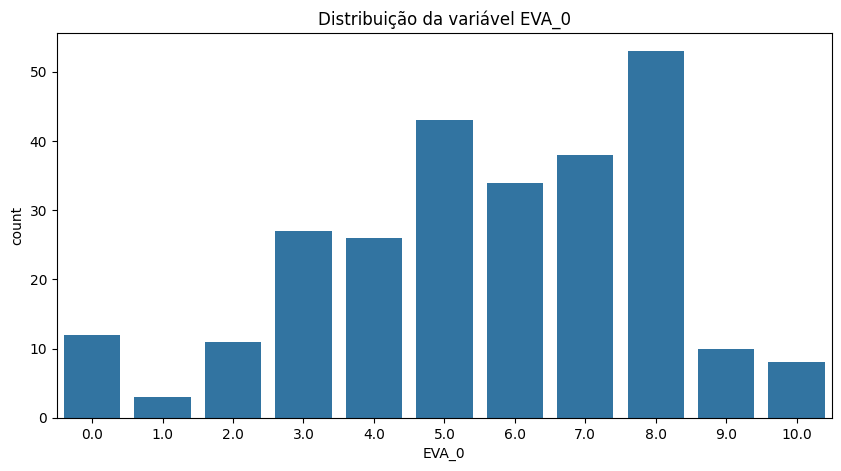

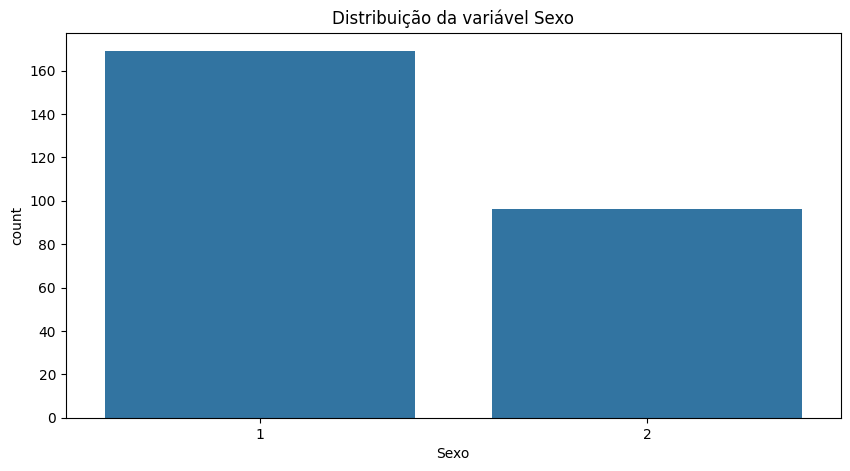

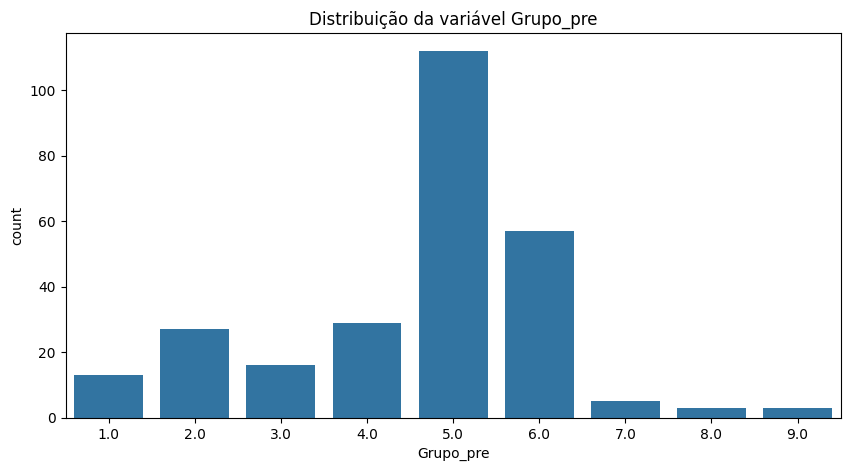

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Certificando-se de que estamos usando o DataFrame correto
#var_int = [f for f in df_orto.columns if df_orto.dtypes[f] == 'int64']
var_int = variaveis_ordinais+variaveis_categoricas
for i, var in enumerate(var_int): 
    plt.figure(figsize=(10, 5))  # Define o tamanho da figura
    sns.countplot(x=df_orto[var])
    plt.title(f'Distribuição da variável {var}')  # Adiciona um título ao gráfico
    plt.show()  # Mostra o gráfico


In [40]:
#import matplotlib.pyplot as plt
#import seaborn as sns

#for i, var in enumerate(var_num): 
#    plt.figure(i)
#    sns.histplot(df_orto3[var])
    

Index(['target', 'Idade ', 'Sexo', 'Peso', 'Altura_cm', 'IMC', 'Grupo_pre',
       'Fle_0', 'EVA_0', 'PM6_0', 'WD_0', 'WR_0', 'WAtotal_0', 'WT_0'],
      dtype='object')
Peso


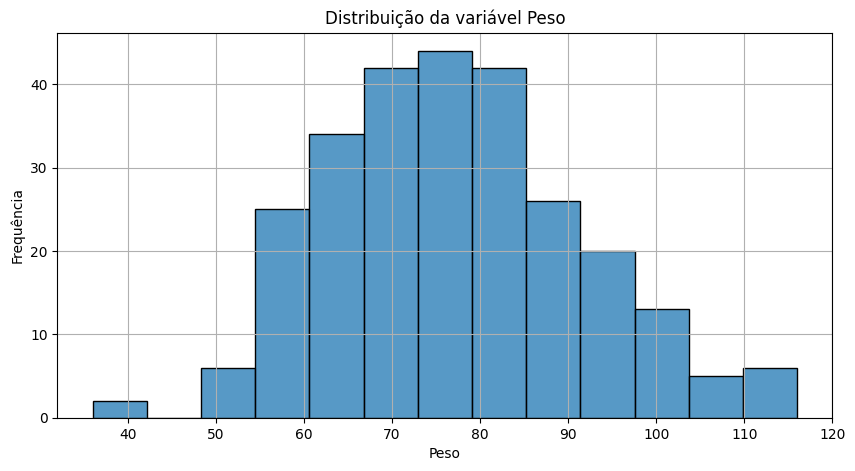

Altura_cm


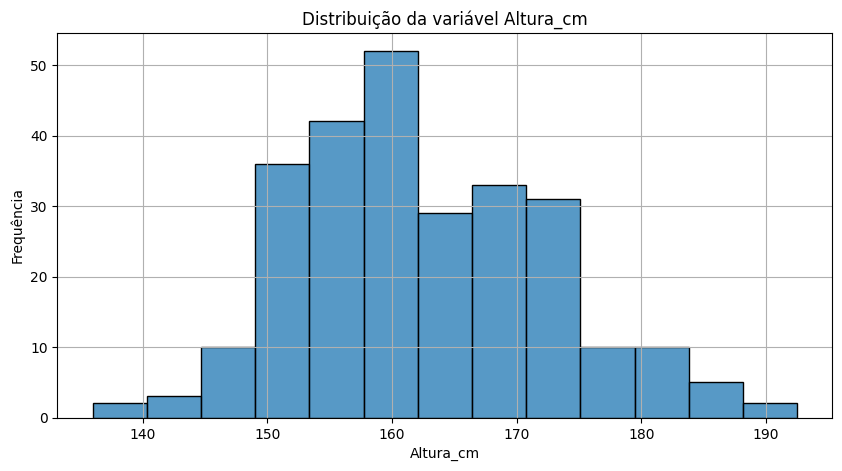

IMC


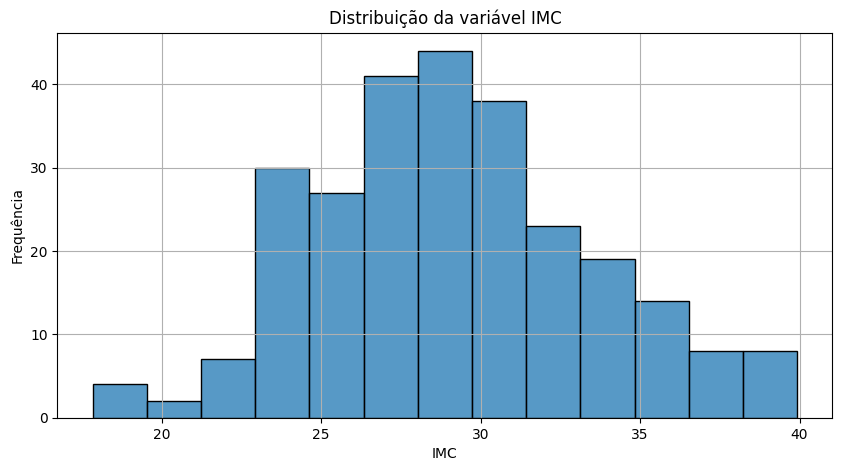

PM6_0


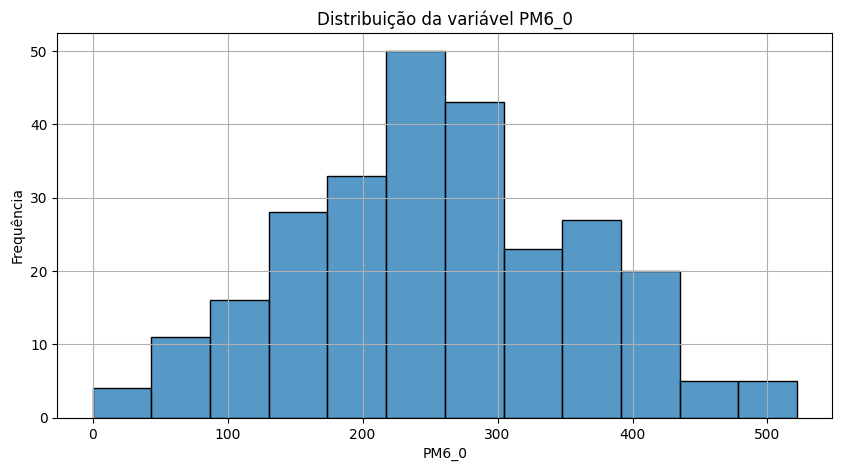

Fle_0


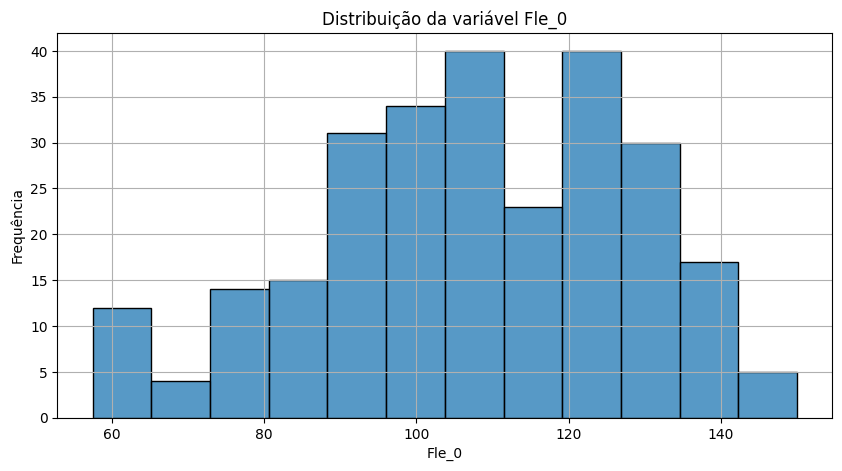

WAtotal_0


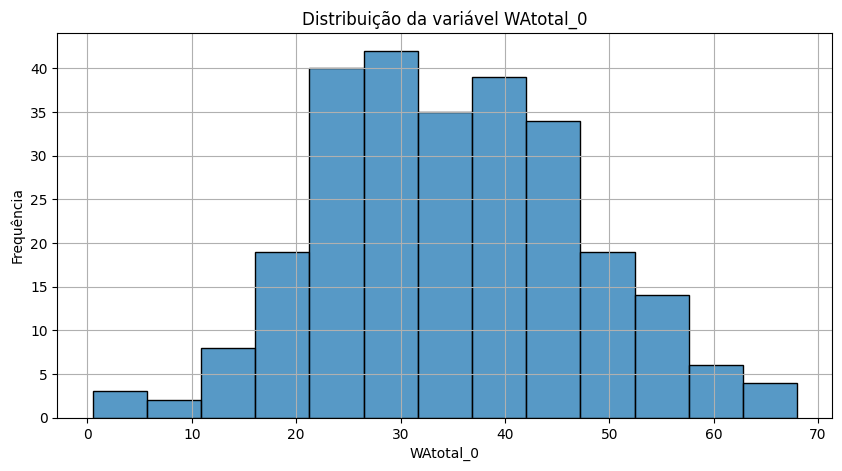

WD_0


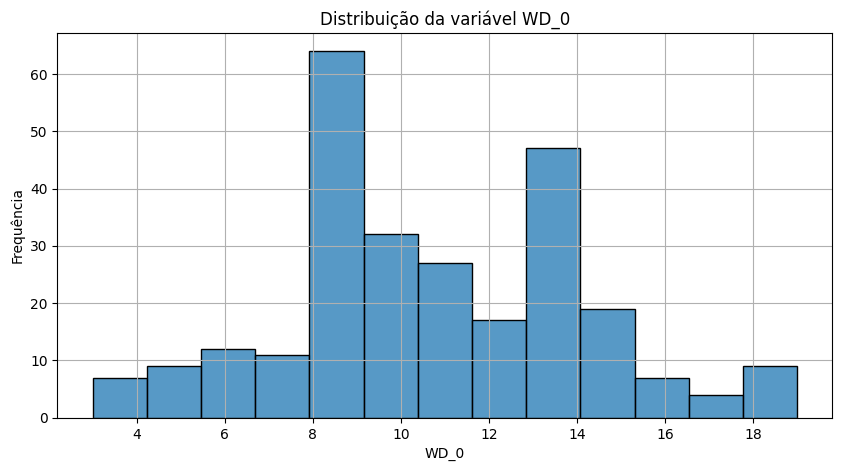

WR_0


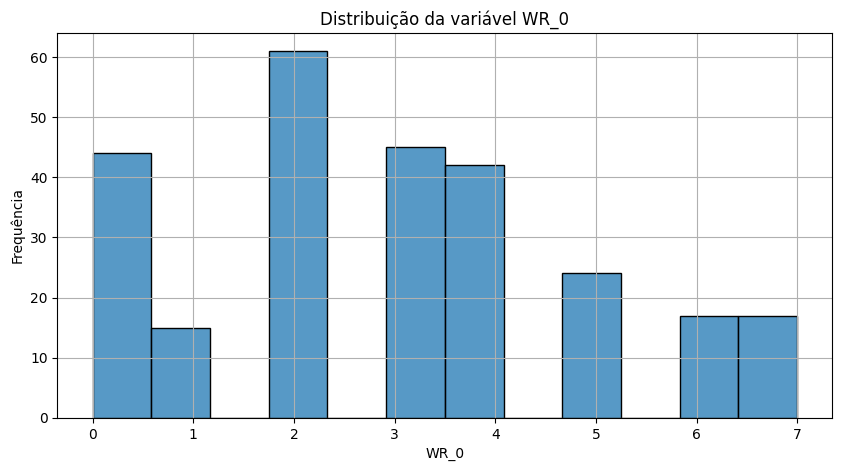

Idade 


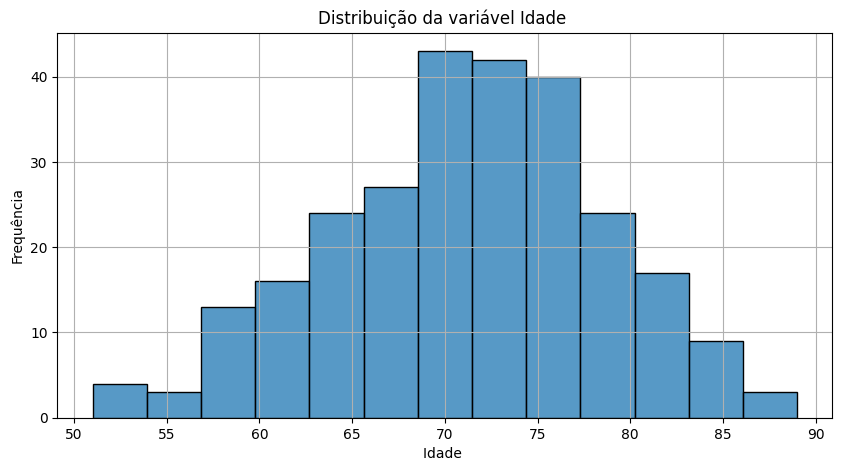

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df_orto3.columns)
# Supondo que var_num já foi definido e contém os nomes das variáveis contínuas
var_num=variaveis_continuas+variaveis_discretas
for i, var in enumerate(var_num): 
    print(var)
    plt.figure(figsize=(10, 5))  # Define o tamanho da figura para uma melhor visualização
    sns.histplot(df_orto3[var])  # kde=True adiciona uma linha de densidade estimada
    plt.title(f'Distribuição da variável {var}')  # Adiciona um título ao histograma
    plt.xlabel(var)  # Adiciona rótulo ao eixo X
    plt.ylabel('Frequência')  # Adiciona rótulo ao eixo Y
    plt.grid(True)  # Adiciona linhas de grade para melhor leitura dos valores
    plt.show()  # Exibe o gráfico



In [42]:
df_orto.dtypes

target         int32
Idade        float64
Sexo           int64
Peso         float64
Altura_cm    float64
IMC          float64
Grupo_pre    float64
Fle_0        float64
EVA_0        float64
PM6_0        float64
WD_0         float64
WR_0         float64
WAtotal_0    float64
WT_0           int64
dtype: object

## 11. Analise bivariada

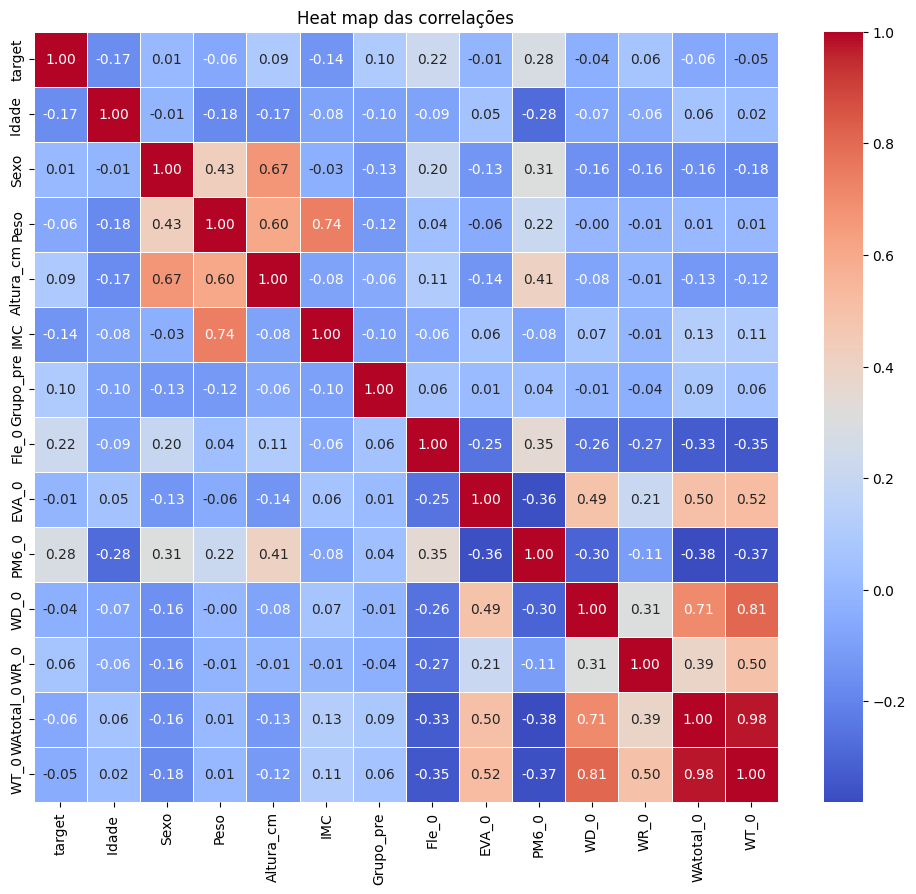

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando a matriz de correlação
correlation_matrix = df_orto3.corr()

# Criando um mapa de calor com anotações
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heat map das correlações')
plt.show()

In [44]:
print("Variáveis Quantitativas (var_num):", var_num)
print("Variáveis Qualitativas (var_int):", var_int)

Variáveis Quantitativas (var_num): ['Peso', 'Altura_cm', 'IMC', 'PM6_0', 'Fle_0', 'WAtotal_0', 'WD_0', 'WR_0', 'Idade ']
Variáveis Qualitativas (var_int): ['EVA_0', 'Sexo', 'Grupo_pre']


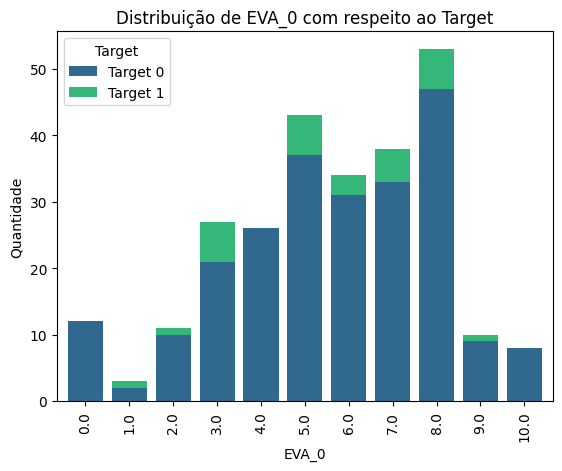

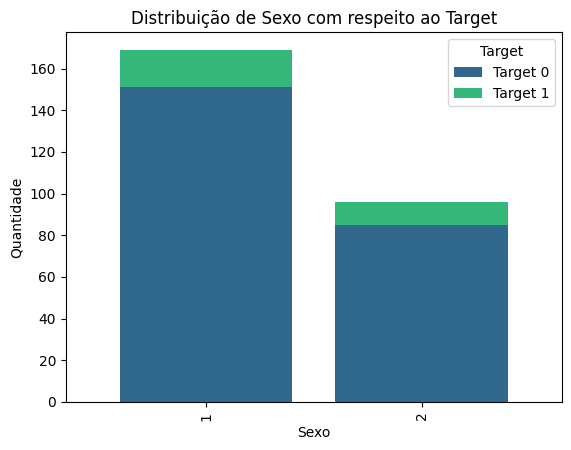

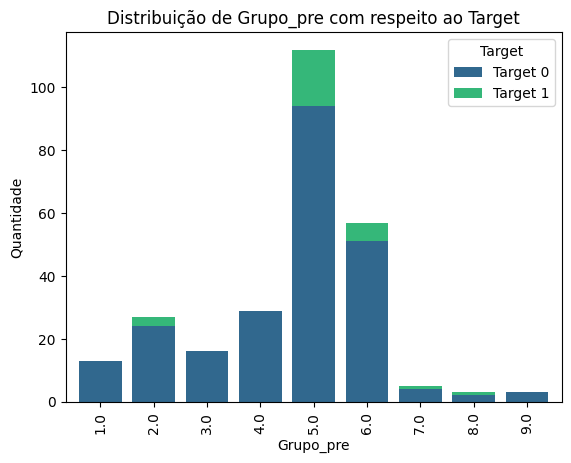

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assegurando que 'target' não está na lista
if 'target' in var_int:
    var_int.remove('target')

# Define uma paleta de cores usando Seaborn, apropriada para o número de categorias em 'target'
colors = sns.color_palette('viridis', n_colors=len(df_orto3['target'].unique()))

# Análise para variáveis qualitativas com 'viridis'
for col in var_int:
    df_crosstab = pd.crosstab(df_orto3[col], df_orto3['target'])
    ax = df_crosstab.plot(kind='bar', stacked=True, color=colors, width=0.8)  # Ajuste a largura aqui
    plt.title(f'Distribuição de {col} com respeito ao Target')
    plt.xlabel(col)
    plt.ylabel('Quantidade')
    plt.legend(title='Target', labels=['Target 0', 'Target 1'])  # Ajuste os rótulos conforme apropriado
    plt.show()


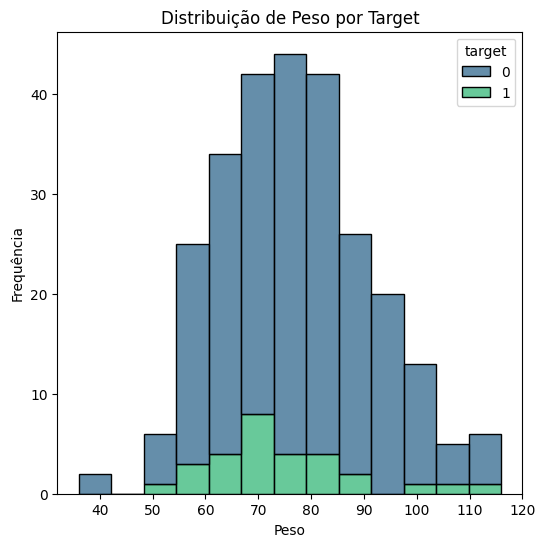

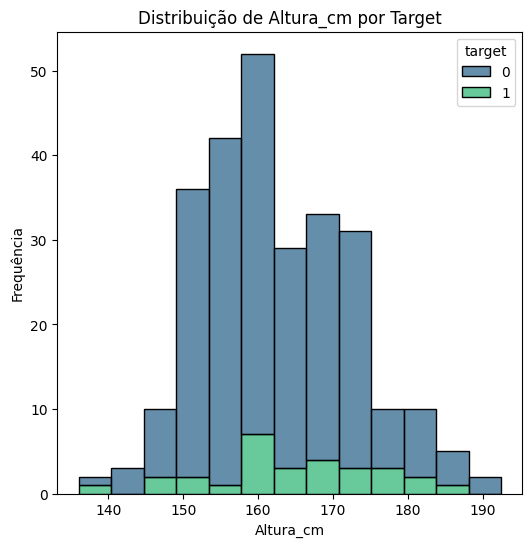

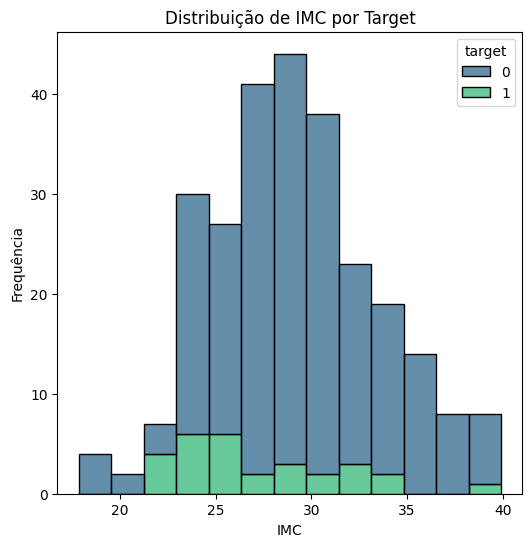

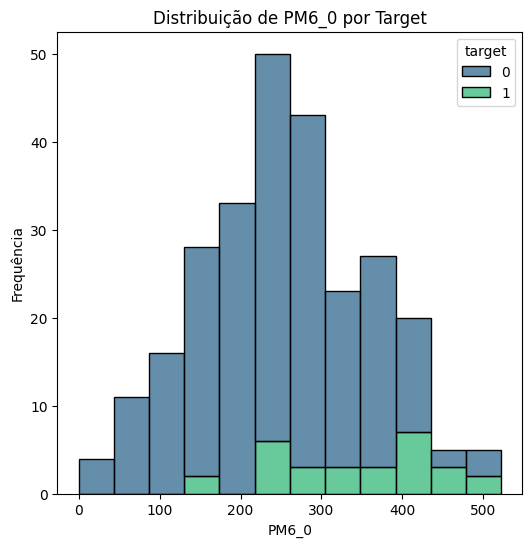

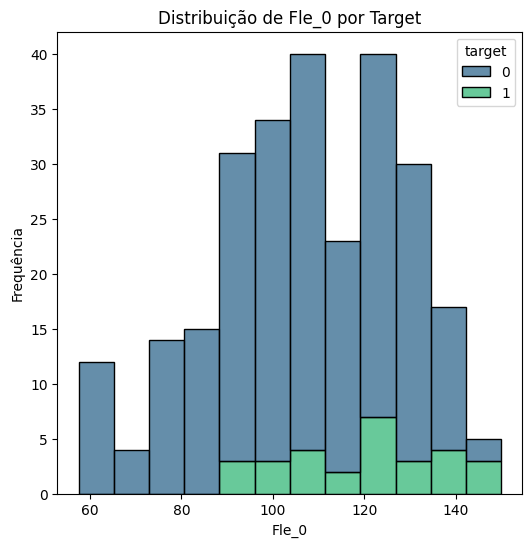

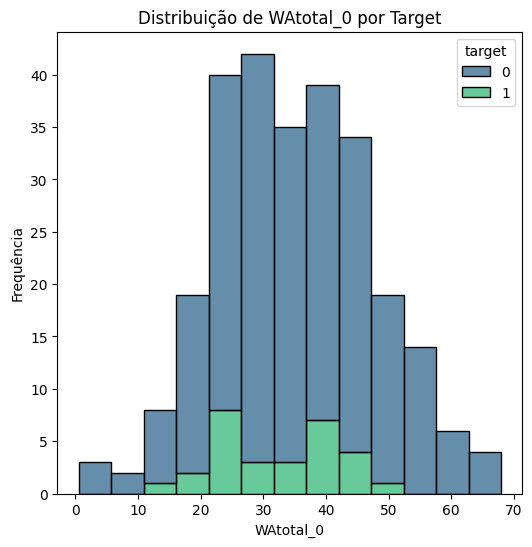

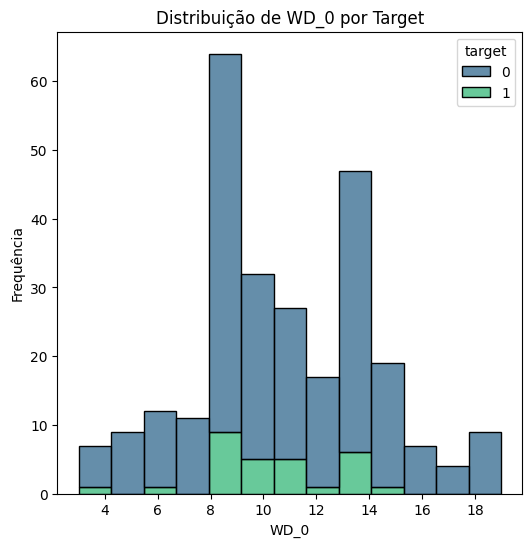

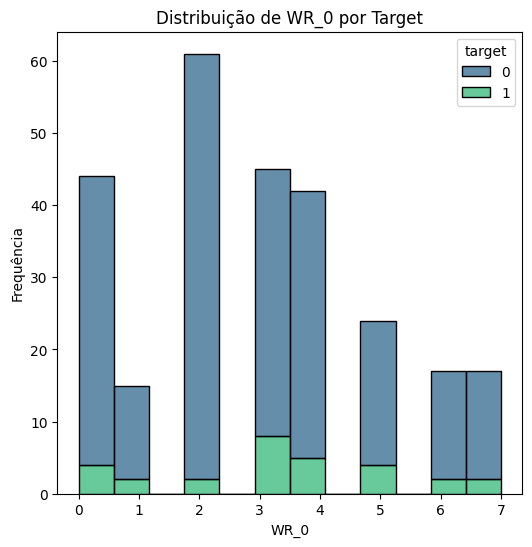

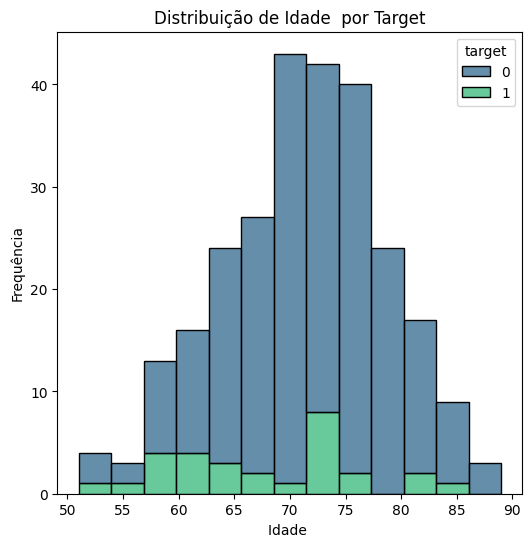

In [46]:
import seaborn as sns

# Análise para variáveis quantitativas
for var in var_num:
    plt.figure(figsize=(6, 6))
    sns.histplot(data=df_orto3, x=var, hue='target', multiple='stack', palette='viridis', edgecolor='black')
    plt.title(f'Distribuição de {var} por Target')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()

## 12. Analise multivariada - correlação (remover variaveis correlacionadas)

In [47]:
#cálculo da correlação
df_orto3.corr(method='spearman')

,target,Idade,Sexo,Peso,Altura_cm,IMC,Grupo_pre,Fle_0,EVA_0,PM6_0,WD_0,WR_0,WAtotal_0,WT_0
target,1.000000,-0.146784,0.012432,-0.083706,0.103684,-0.154460,0.106731,0.207391,-0.016198,0.260281,-0.030236,0.074572,-0.069079,-0.045994
Idade,-0.146784,1.000000,-0.011506,-0.181696,-0.161991,-0.117869,-0.102848,-0.101511,0.061940,-0.285604,-0.060725,-0.089815,0.074449,0.032352
Sexo,0.012432,-0.011506,1.000000,0.408031,0.674140,-0.029044,-0.141867,0.204158,-0.162416,0.293916,-0.141074,-0.162679,-0.160061,-0.168048
Peso,-0.083706,-0.181696,0.408031,1.000000,0.550463,0.744383,-0.132237,0.019043,-0.067739,0.204056,0.008740,-0.031394,0.005054,0.003668
Altura_cm,0.103684,-0.161991,0.674140,0.550463,1.000000,-0.097971,-0.063152,0.115799,-0.164304,0.394506,-0.082659,-0.023805,-0.146353,-0.126638
IMC,-0.154460,-0.117869,-0.029044,0.744383,-0.097971,1.000000,-0.120266,-0.070935,0.059701,-0.066270,0.076244,0.004521,0.119056,0.106851
Grupo_pre,0.106731,-0.102848,-0.141867,-0.132237,-0.063152,-0.120266,1.000000,0.041180,0.026775,0.037361,-0.017176,-0.030981,0.060784,0.050558
Fle_0,0.207391,-0.101511,0.204158,0.019043,0.115799,-0.070935,0.041180,1.000000,-0.274192,0.329168,-0.244834,-0.266706,-0.324699,-0.339086
EVA_0,-0.016198,0.061940,-0.162416,-0.067739,-0.164304,0.059701,0.026775,-0.274192,1.000000,-0.373052,0.484487,0.211520,0.503306,0.527840
PM6_0,0.260281,-0.285604,0.293916,0.204056,0.394506,-0.066270,0.037361,0.329168,-0.373052,1.000000,-0.296206,-0.109867,-0.378772,-0.365065


<Axes: >

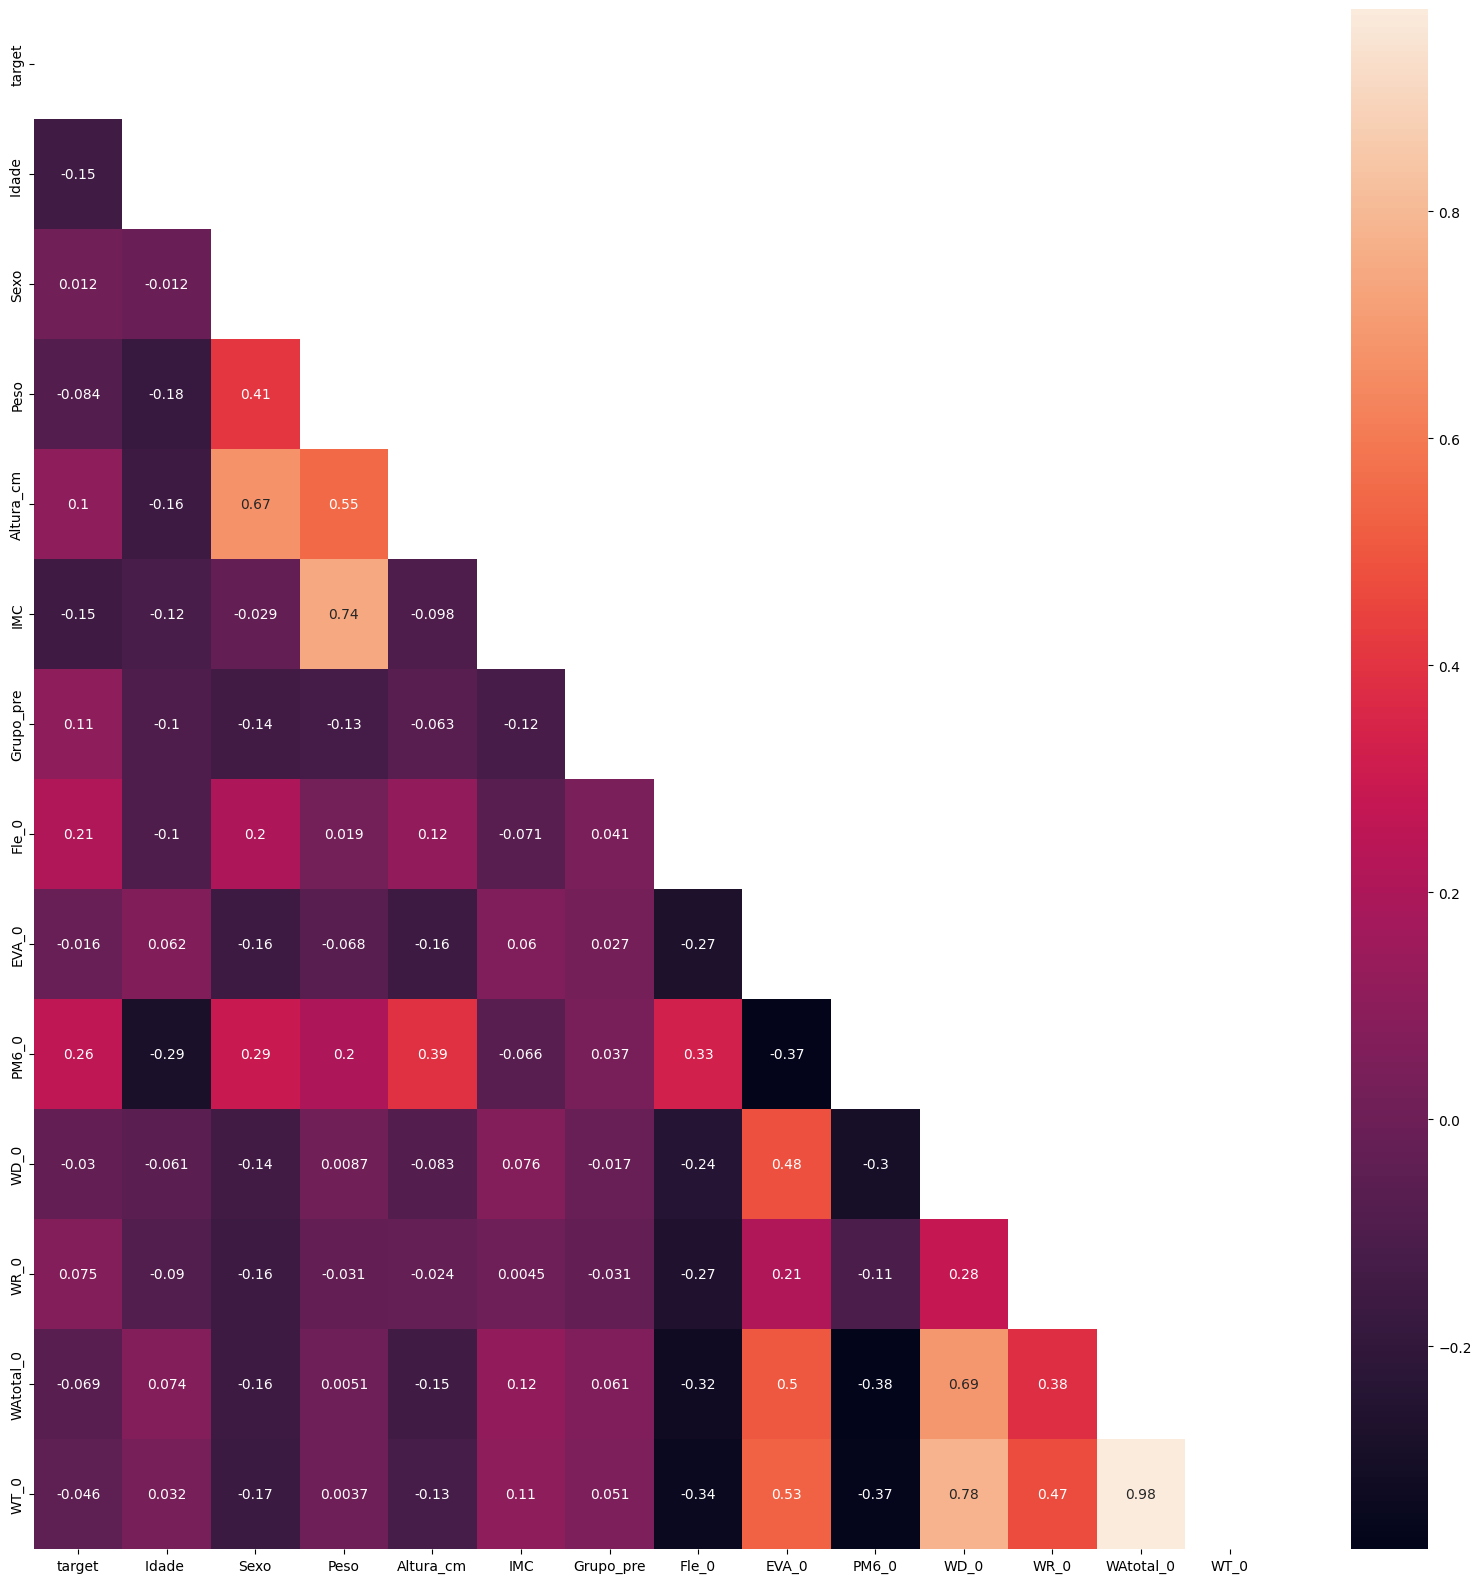

In [48]:
#Visualização gráfica
matrix = np.triu(df_orto3.corr(method="spearman"))

plt.figure(figsize=(20,20))
sns.heatmap(df_orto3.corr(method="spearman"), annot=True, mask=matrix)

In [49]:
#Correlações positivas muito fortes --> WAtotal_0 vs WT_0; 

In [50]:
#Spearman
corr_matrix_abs=df_orto3.corr(method="spearman").abs()
s = corr_matrix_abs.unstack().sort_values(ascending=False)
lst_corr_cont70 = pd.Series(s).where(lambda x : (s>=0.7) & (s<1)).dropna()
lst_corr_cont70=lst_corr_cont70.reset_index()
lst_corr_cont70=lst_corr_cont70.rename(columns={0:'Corr_Spearman'})
lst_corr_cont70

,level_0,level_1,Corr_Spearman
0,WAtotal_0,WT_0,0.977975
1,WT_0,WAtotal_0,0.977975
2,WT_0,WD_0,0.777303
3,WD_0,WT_0,0.777303
4,IMC,Peso,0.744383
5,Peso,IMC,0.744383


In [51]:
#Pearson
#Criar uma tabela com as correlações acima de 0.7
corr_matrix_abs = df_orto3.corr().abs()
s = corr_matrix_abs.unstack().sort_values(ascending=False)
lst_corr_cont70 = pd.Series(s).where(lambda x : (s>0.7) & (s<1)).dropna()
lst_corr_cont70=lst_corr_cont70.reset_index()
lst_corr_cont70=lst_corr_cont70.rename(columns={0:'Corr_Pearson'})
lst_corr_cont70

,level_0,level_1,Corr_Pearson
0,WT_0,WAtotal_0,0.978365
1,WAtotal_0,WT_0,0.978365
2,WT_0,WD_0,0.807959
3,WD_0,WT_0,0.807959
4,Peso,IMC,0.736511
5,IMC,Peso,0.736511
6,WAtotal_0,WD_0,0.707600
7,WD_0,WAtotal_0,0.707600


<Axes: >

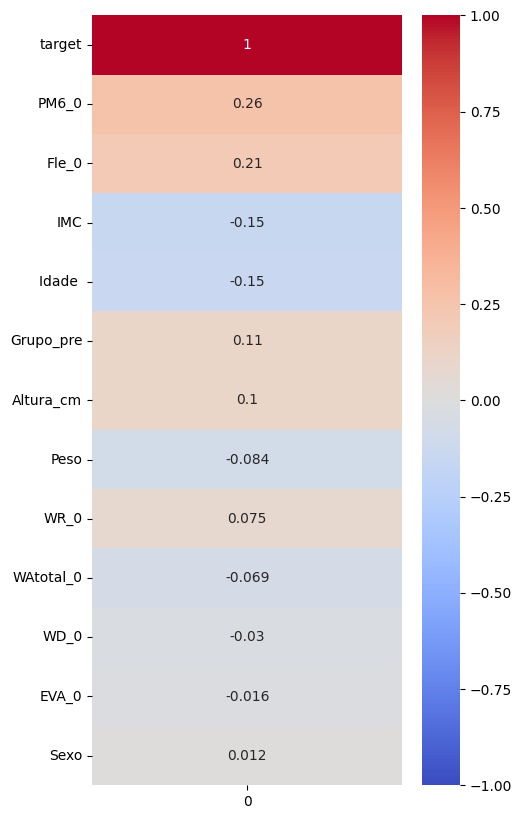

In [52]:
#Correlação com a target
correlations=df_orto3.corrwith(df_orto3['target'], method='spearman').iloc[:-1].to_frame()
correlations['abs']=correlations[0].abs()
sorted_correlations=correlations.sort_values('abs', ascending=False)[0]

fig, ax= plt.subplots(figsize=(5,10))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax)

In [53]:
#correlação com a target mais fraca no par correlacionado --> WT_0; 

In [54]:
#Remover colunas correlacionadas:
df_orto3 = df_orto3.drop(['WT_0'],axis=1)

<Axes: >

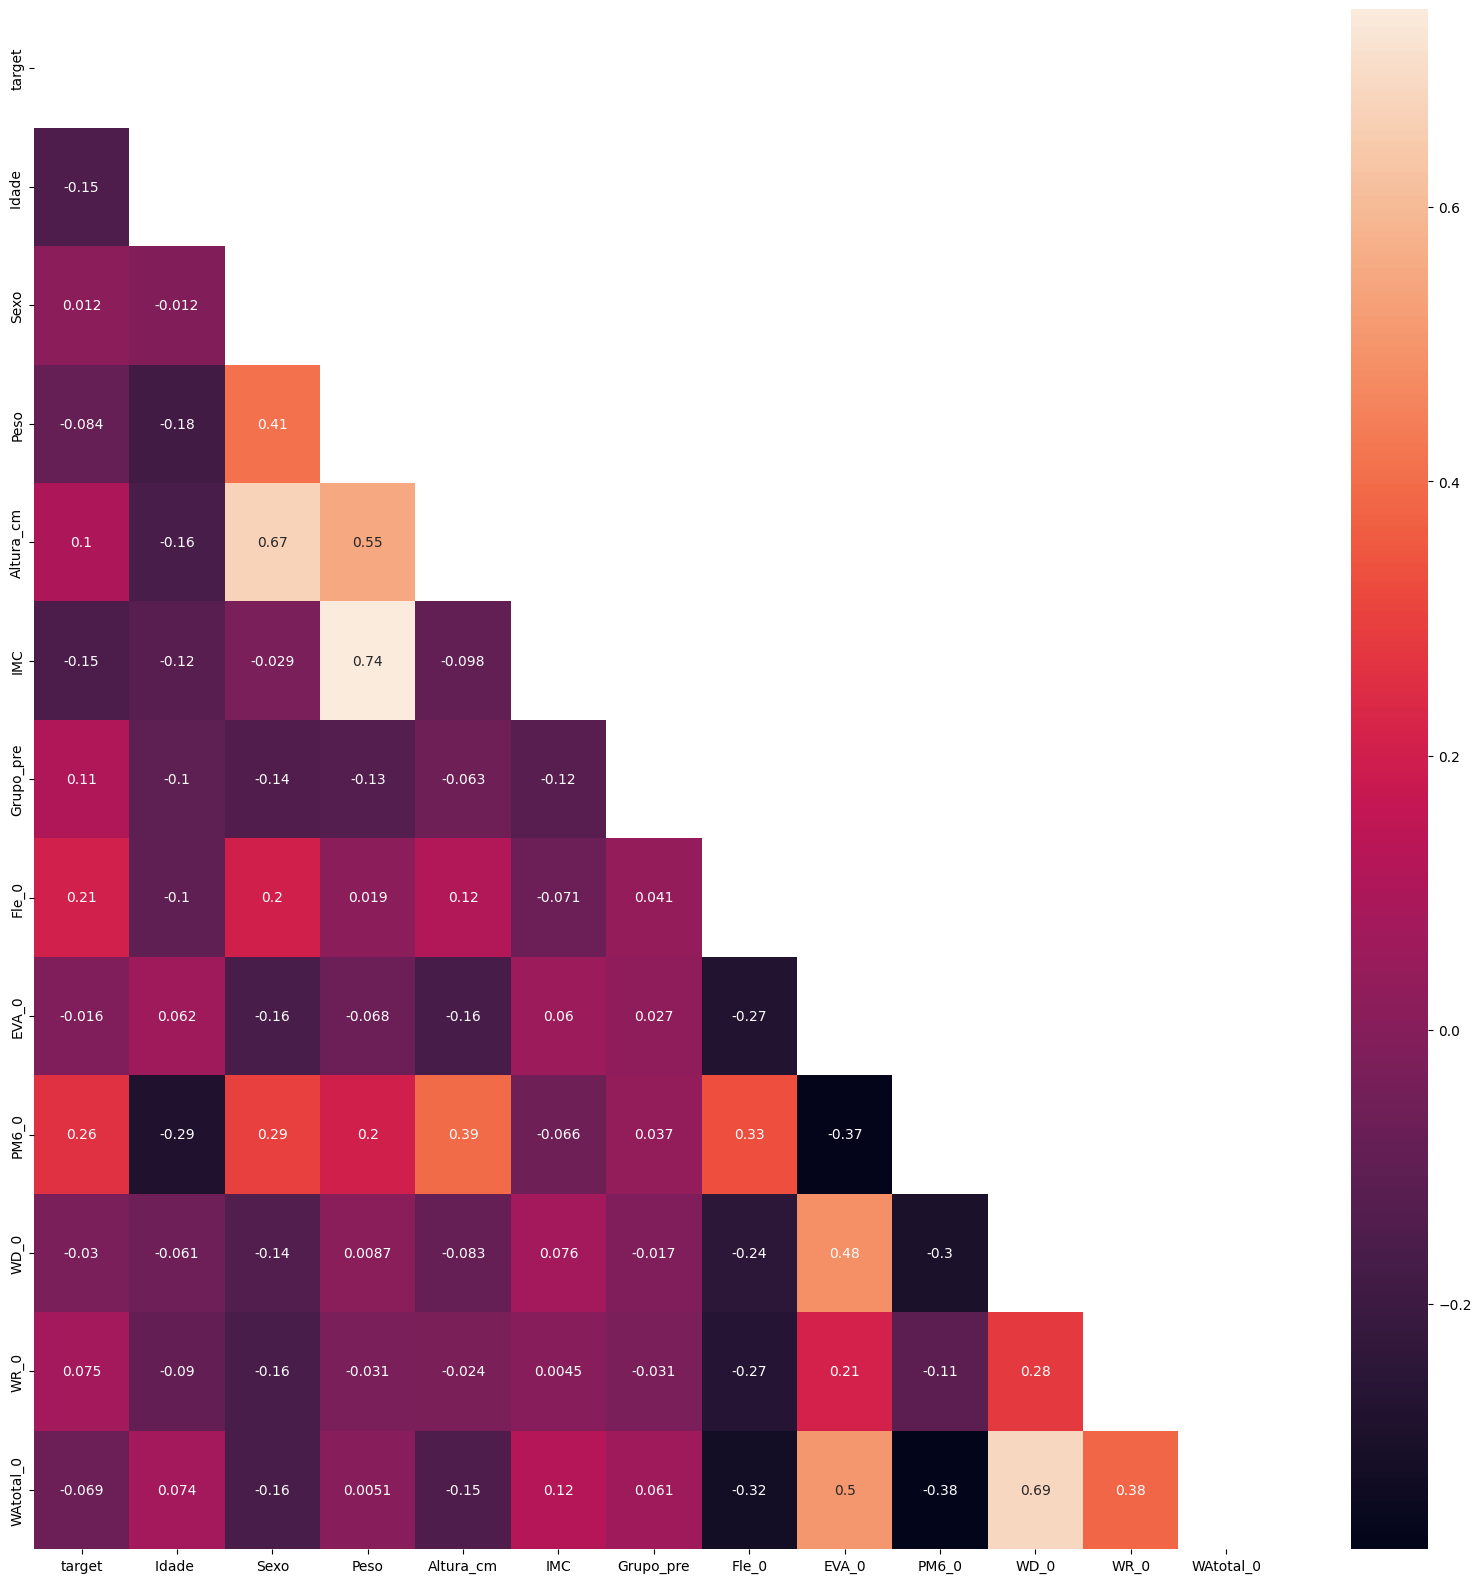

In [55]:
matrix = np.triu(df_orto3.corr(method="spearman"))

plt.figure(figsize=(20,20))
sns.heatmap(df_orto3.corr(method="spearman"), annot=True, mask=matrix)



## Output (df_orto_cleaned)

In [56]:

for var in df_orto3.columns:
    if var in var_int_save: 
        df_orto3[var] = df_orto3[var].astype(int)  # Converte para int e mantém como int

df_orto_cleaned = df_orto3
df_orto_cleaned

,target,Idade,Sexo,Peso,Altura_cm,IMC,Grupo_pre,Fle_0,EVA_0,PM6_0,WD_0,WR_0,WAtotal_0
0,0,67,1,80.0,158.0,32.046146,5.0,86.0,4.0,324.0,15,6,54.0
1,0,76,2,60.0,155.0,24.973985,5.0,90.0,4.0,357.0,14,7,39.0
2,0,72,2,93.0,182.0,28.076319,1.0,57.5,10.0,289.0,15,4,53.0
3,0,67,2,71.0,163.0,26.722873,6.0,127.0,2.0,390.0,3,1,16.0
4,0,66,1,49.0,160.0,19.140625,6.0,120.0,0.0,285.0,3,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,1,73,1,71.0,153.0,30.330215,5.0,92.0,8.0,220.0,11,5,41.0
261,1,77,2,63.0,161.0,24.304618,5.0,130.0,7.0,160.0,13,2,44.0
262,0,76,1,65.0,155.0,27.055151,6.0,80.0,9.0,60.0,15,7,46.0
263,0,70,1,54.0,169.0,18.906901,4.0,95.0,7.0,420.0,7,3,24.0


# Modelling

Aqui iremos:

0. Separação de target e features (df_orto_y, df_orto_X)
1. Fazer undersampling (df_orto_under)
2. Fazer oversampling (df_orto_over)
3. Criação dos datasets 70/30 (treino e teste):
    1. Para o dataframe original (df_orto_X_train, df_orto_X_test, df_orto_y_train, df_orto_y_test)
    2. Para o dataframe undersampling (df_orto_under_X_train, df_orto_under_X_test, df_orto_under_y_train, df_orto_under_y_test)
    3. Para o dataframe oversampling (df_orto_over_X_train, df_orto_over_X_test, df_orto_over_y_train, df_orto_over_y_test)
4. Aplicação dos modelos e gerar dados de classificação:
    1. Random Forest
        1. Para o dataframe original 
            1. Split 70/30 
            2. Cross-Validation
        2. Para o dataframe undersampling 
            1. Split 70/30
            2. Cross-Validation
        3. Para o dataframe oversampling 
            1. Split 70/30
            2. Cross-Validation
    2. Decision Tree
        1. Para o dataframe original 
            1. Split 70/30
            2. Cross-Validation
        2. Para o dataframe undersampling 
            1. Split 70/30
            2. Cross-Validation
        3. Para o dataframe oversampling 
            1. Split 70/30
            2. Cross-Validation
    3. Regressão Logistica
        1. Para o dataframe original
            1. Split 70/30
            2. Cross-Validation
            3. Exportação de dados de classificação para Excel ou csv
        2. Para o dataframe undersampling 
            1. Split 70/30
            2. Cross-Validation
            3. Exportação de dados de classificação para Excel ou csv
        3. Para o dataframe oversampling 
            1. Split 70/30
            2. Cross-Validation
            3. Exportação de dados de classificação para Excel ou csv
    4. Outros...(Optional)
        1. Para o dataframe original
            1. Split 70/30
            2. Cross-Validation
            3. Exportação de dados de classificação para Excel ou csv
        2. Para o dataframe undersampling 
            1. Split 70/30
            2. Cross-Validation
            3. Exportação de dados de classificação para Excel ou csv
        3. Para o dataframe oversampling 
            1. Split 70/30
            2. Cross-Validation
            3. Exportação de dados de classificação para Excel ou csv



## 0. Separação de target e features

In [57]:
#Dataset original
df_orto_X = df_orto_cleaned.drop('target', axis=1)
df_orto_y = df_orto_cleaned['target']
print(print(df_orto_cleaned['target'].value_counts()))
print(print(df_orto_cleaned['target'].value_counts(normalize=True)))
print(df_orto_y.head(10))
df_orto_X.head(10)


target
0    236
1     29
Name: count, dtype: int64
None
target
0    0.890566
1    0.109434
Name: proportion, dtype: float64
None
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: target, dtype: int32


,Idade,Sexo,Peso,Altura_cm,IMC,Grupo_pre,Fle_0,EVA_0,PM6_0,WD_0,WR_0,WAtotal_0
0,67,1,80.0,158.0,32.046146,5.0,86.0,4.0,324.0,15,6,54.0
1,76,2,60.0,155.0,24.973985,5.0,90.0,4.0,357.0,14,7,39.0
2,72,2,93.0,182.0,28.076319,1.0,57.5,10.0,289.0,15,4,53.0
3,67,2,71.0,163.0,26.722873,6.0,127.0,2.0,390.0,3,1,16.0
4,66,1,49.0,160.0,19.140625,6.0,120.0,0.0,285.0,3,0,8.0
5,81,2,66.0,160.0,25.781250,4.0,82.0,4.0,135.0,9,3,26.0
6,72,1,63.0,162.0,24.005487,3.0,95.0,1.0,366.0,13,5,0.5
7,76,1,56.0,148.0,25.566107,6.0,65.0,9.0,249.0,14,6,43.0
8,81,1,81.0,162.0,30.864198,3.0,80.0,2.0,180.0,14,4,55.0
9,73,1,80.0,170.0,27.681661,5.0,95.0,0.0,501.0,11,4,44.0


In [58]:
# Verificar se ainda existem valores ausentes em df_orto_X
print(df_orto_X.isnull().sum())

# Verificar se existem valores ausentes em df_orto_y
print(df_orto_y.isnull().sum())


Idade        0
Sexo         0
Peso         0
Altura_cm    0
IMC          0
Grupo_pre    0
Fle_0        0
EVA_0        0
PM6_0        0
WD_0         0
WR_0         0
WAtotal_0    0
dtype: int64
0


## 1. Fazer undersampling (df_orto_under)

In [59]:
#Undersampling: criar dataset - 70% target 0, 30% target 1, não se faz uma diferença mais proxima de 50/50 por haver poucos dados

from imblearn.under_sampling import RandomUnderSampler
# Contagem original das classes
num_target_0_orig = df_orto_cleaned['target'].value_counts().to_dict()[0]
num_target_1_orig = df_orto_cleaned['target'].value_counts().to_dict()[1]
# Proporção desejada
prop_target_0_desired = 0.7
prop_target_1_desired = 0.3
# Calcula o número de instâncias desejadas para cada classe
num_target_0_under = int(num_target_1_orig * (prop_target_0_desired / prop_target_1_desired))
num_target_1_under = num_target_1_orig
# Criando o objeto RandomUnderSampler com a estratégia de amostragem desejada
rus = RandomUnderSampler(sampling_strategy={0: num_target_0_under, 1: num_target_1_under}, random_state=42)
# Aplicando o undersampling aos dados
df_orto_under_X, df_orto_under_y = rus.fit_resample(df_orto_X, df_orto_y)
# Verificando as proporções resultantes
df_orto_under_y.value_counts(normalize=True)


target
0    0.697917
1    0.302083
Name: proportion, dtype: float64

## 2. Fazer oversampling (df_orto_over)

In [60]:
print(df_orto_X.dtypes)

Idade          int32
Sexo           int32
Peso         float64
Altura_cm    float64
IMC          float64
Grupo_pre    float64
Fle_0        float64
EVA_0        float64
PM6_0        float64
WD_0           int32
WR_0           int32
WAtotal_0    float64
dtype: object


In [61]:
#pip install -U scikit-learn imbalanced-learn

In [62]:
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Verificar e tratar NaNs e infinitos em df_orto_X
if df_orto_X.isnull().any().any() or np.isinf(df_orto_X).any().any():
    print("NaNs or infinities detected in df_orto_X. Applying imputation.")
    # Aplicar imputação
    imputer = SimpleImputer(strategy='median')
    df_orto_X = pd.DataFrame(imputer.fit_transform(df_orto_X), columns=df_orto_X.columns)

# Proporção desejada para oversampling
num_target_0_orig = df_orto_y.value_counts()[0]
num_target_1_orig = df_orto_y.value_counts()[1]
prop_target_0_desired = 0.6
prop_target_1_desired = 0.4
num_target_1_over = int(num_target_0_orig * (prop_target_1_desired / prop_target_0_desired))

# Configuração do SMOTE
smote_os = SMOTE(sampling_strategy={0: num_target_0_orig, 1: num_target_1_over}, random_state=42)

# Aplicando o oversampling aos dados
df_orto_over_X, df_orto_over_y = smote_os.fit_resample(df_orto_X, df_orto_y)

# Verificando as proporções resultantes
print(df_orto_over_y.value_counts(normalize=True))


target
0    0.600509
1    0.399491
Name: proportion, dtype: float64


## 3. Criação dos datasets 70/30:

### 3.1. Para o dataframe original (df_orto_X_train, df_orto_X_test, df_orto_y_train, df_orto_y_test)

In [63]:
#Criar dataset treino e de teste
from sklearn.model_selection import train_test_split

df_orto_X_train, df_orto_X_test, df_orto_y_train, df_orto_y_test = train_test_split(df_orto_X, df_orto_y, test_size=0.30, random_state=42)

print("Distribuição da Target - Treino")
print("N. observações Treino", len(df_orto_X_train))
print(df_orto_y_train.value_counts(normalize=True))

print("Distribuição da Target - Teste")
print("N. observações Teste", len(df_orto_X_test))
print(df_orto_y_test.value_counts(normalize=True))

Distribuição da Target - Treino
N. observações Treino 185
target
0    0.902703
1    0.097297
Name: proportion, dtype: float64
Distribuição da Target - Teste
N. observações Teste 80
target
0    0.8625
1    0.1375
Name: proportion, dtype: float64


### 3.2. Para o dataframe undersampling (df_orto_under_X_train, df_orto_under_X_test, df_orto_under_y_train, df_orto_under_y_test)

In [64]:
#Criar dataset treino e de teste
from sklearn.model_selection import train_test_split

df_orto_under_X_train, df_orto_under_X_test, df_orto_under_y_train, df_orto_under_y_test = train_test_split(df_orto_under_X, df_orto_under_y, test_size=0.30, random_state=42)

print("Distribuição da Target - Treino")
print("N. observações Treino", len(df_orto_under_X_train))
print(df_orto_under_y_train.value_counts(normalize=True))

print("Distribuição da Target - Teste")
print("N. observações Teste", len(df_orto_under_X_test))
print(df_orto_under_y_test.value_counts(normalize=True))

Distribuição da Target - Treino
N. observações Treino 67
target
0    0.716418
1    0.283582
Name: proportion, dtype: float64
Distribuição da Target - Teste
N. observações Teste 29
target
0    0.655172
1    0.344828
Name: proportion, dtype: float64


### 3.3. Para o dataframe oversampling (df_orto_over_X_train, df_orto_over_X_test, df_orto_over_y_train, df_orto_over_y_test)

In [65]:
#Criar dataset treino e de teste
from sklearn.model_selection import train_test_split

df_orto_over_X_train, df_orto_over_X_test, df_orto_over_y_train, df_orto_over_y_test = train_test_split(df_orto_over_X, df_orto_over_y, test_size=0.30, random_state=42)

print("Distribuição da Target - Treino")
print("N. observações Treino", len(df_orto_over_X_train))
print(df_orto_over_y_train.value_counts(normalize=True))

print("Distribuição da Target - Teste")
print("N. observações Teste", len(df_orto_over_X_test))
print(df_orto_over_y_test.value_counts(normalize=True))

Distribuição da Target - Treino
N. observações Treino 275
target
0    0.592727
1    0.407273
Name: proportion, dtype: float64
Distribuição da Target - Teste
N. observações Teste 118
target
0    0.618644
1    0.381356
Name: proportion, dtype: float64


## 4. Aplicação dos modelos e gerar dados de classificação:

In [66]:
# Bibliotecas modelos de machine learning
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 4.1. Random Forest

#### 4.1.1. Para o dataframe original 

##### 4.1.1.1. Split 70/30

In [67]:
#(df_orto_X_train, df_orto_X_test, df_orto_y_train, df_orto_y_test)
# Aplicar modelo
clf_RF_df_orto_70_30 = RandomForestClassifier(random_state=42)
clf_RF_df_orto_70_30.fit(df_orto_X_train, df_orto_y_train)

# Fazer previsões
y_pred_RF_df_orto_70_30 = clf_RF_df_orto_70_30.predict(df_orto_X_test)

# Obter matriz de confusão
conf_mtx_RF_df_orto_70_30 = confusion_matrix(df_orto_y_test, y_pred_RF_df_orto_70_30)
print("Matriz de Confusão:")
print(conf_mtx_RF_df_orto_70_30)

# Avaliação/Métricas do RandomForest - com 4 casas decimais
report_RF_df_orto_70_30 = classification_report(df_orto_y_test, y_pred_RF_df_orto_70_30, digits=4, output_dict=True)
print(classification_report(df_orto_y_test, y_pred_RF_df_orto_70_30, digits=4))

# Calcular valor da AUC
auc_RF_df_orto_70_30 = roc_auc_score(df_orto_y_test, y_pred_RF_df_orto_70_30)
print("AUC:", auc_RF_df_orto_70_30)

# Converter relatório para DataFrame e adicionar AUC diretamente como uma coluna
report_df_RF_df_orto_70_30 = pd.DataFrame(report_RF_df_orto_70_30).transpose()
report_df_RF_df_orto_70_30['AUC'] = auc_RF_df_orto_70_30  # Adicionar AUC diretamente

# Criar DataFrame para a matriz de confusão
conf_matrix_df_RF_df_orto_70_30 = pd.DataFrame(conf_mtx_RF_df_orto_70_30,
                                               index=['Actual Negative', 'Actual Positive'],
                                               columns=['Predicted Negative', 'Predicted Positive'])

# Exportar para Excel
with pd.ExcelWriter('Proj-Dados/Orig-RF-classification-report_70_30.xlsx') as writer:
    report_df_RF_df_orto_70_30.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_RF_df_orto_70_30.to_excel(writer, sheet_name='Confusion Matrix')

print("Exported to Excel successfully!")


Matriz de Confusão:
[[69  0]
 [11  0]]
              precision    recall  f1-score   support

           0     0.8625    1.0000    0.9262        69
           1     0.0000    0.0000    0.0000        11

    accuracy                         0.8625        80
   macro avg     0.4313    0.5000    0.4631        80
weighted avg     0.7439    0.8625    0.7988        80

AUC: 0.5
Exported to Excel successfully!


c:\Users\raque\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raque\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raque\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

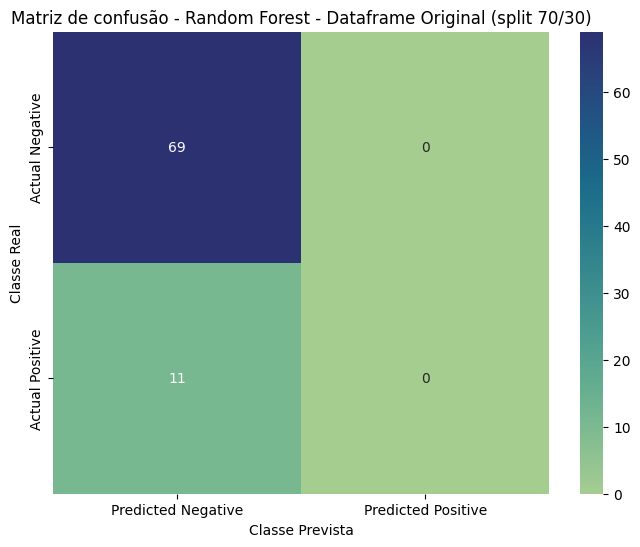

In [68]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_RF_df_orto_70_30, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Random Forest - Dataframe Original (split 70/30)")

# Mostrar o gráfico
plt.show()

##### 4.1.1.2. Cross-Validation

In [69]:
#(df_orto_X, df_orto_y)
# Aplicar modelo com Cross-Validation
clf_RF_df_orto_CV = RandomForestClassifier(random_state=42)
y_pred_RF_df_orto_CV = cross_val_predict(clf_RF_df_orto_CV, df_orto_X, df_orto_y, cv=5)
print(y_pred_RF_df_orto_CV)

# Obter matriz de confusão
conf_mtx_RF_df_orto_CV = confusion_matrix(df_orto_y, y_pred_RF_df_orto_CV)
print("Matriz de Confusão:")
print(conf_mtx_RF_df_orto_CV)

# Avaliação/Métricas do RandomForest - com 4 casas decimais
report_RF_df_orto_CV = classification_report(df_orto_y, y_pred_RF_df_orto_CV, digits=4, output_dict=True)
print(classification_report(df_orto_y, y_pred_RF_df_orto_CV, digits=4))

# Calcular valor da AUC
auc_RF_df_orto_CV = roc_auc_score(df_orto_y, y_pred_RF_df_orto_CV)
print("AUC:", auc_RF_df_orto_CV)

# Converter relatório para DataFrame e adicionar AUC diretamente como uma coluna
report_df_RF_df_orto_CV = pd.DataFrame(report_RF_df_orto_CV).transpose()
report_df_RF_df_orto_CV['AUC'] = auc_RF_df_orto_CV  # Adicionar AUC diretamente

# Criar DataFrame para a matriz de confusão
conf_matrix_df_RF_df_orto_CV = pd.DataFrame(conf_mtx_RF_df_orto_CV,
                                            index=['Actual Negative', 'Actual Positive'],
                                            columns=['Predicted Negative', 'Predicted Positive'])

# Exportar para Excel
with pd.ExcelWriter('Proj-Dados/Orig-RF-classification-report_CV.xlsx') as writer:
    report_df_RF_df_orto_CV.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_RF_df_orto_CV.to_excel(writer, sheet_name='Confusion Matrix')

print("Exported to Excel successfully!")



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0]
Matriz de Confusão:
[[235   1]
 [ 27   2]]
              precision    recall  f1-score   support

           0     0.8969    0.9958    0.9438       236
           1     0.6667    0.0690    0.1250        29

    accuracy                         0.8943       265
   macro avg     0.7818    0.5324    0.5344       265
weighted avg     0.8717    0.8943    0.8542       265

AUC: 0.532364114552893
Exported to Excel successfully!


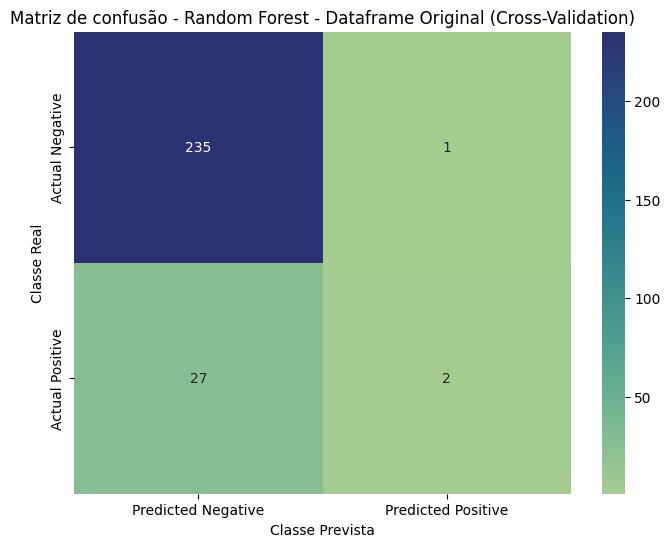

In [70]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_RF_df_orto_CV, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Random Forest - Dataframe Original (Cross-Validation)")

# Mostrar o gráfico
plt.show()

#### 4.1.2. Para o dataframe undersampling

##### 4.1.2.1. - Split 70/30

In [71]:
# (df_orto_under_X_train, df_orto_under_X_test, df_orto_under_y_train, df_orto_under_y_test)

# Configuração e treino do modelo
clf_RF_under_70_30 = RandomForestClassifier(random_state=42)
clf_RF_under_70_30.fit(df_orto_under_X_train, df_orto_under_y_train)

# Previsões
y_pred_RF_under_70_30 = clf_RF_under_70_30.predict(df_orto_under_X_test)

# Avaliação
conf_mtx_RF_under_70_30 = confusion_matrix(df_orto_under_y_test, y_pred_RF_under_70_30)
report_RF_under_70_30 = classification_report(df_orto_under_y_test, y_pred_RF_under_70_30, digits=4, output_dict=True)
auc_RF_under_70_30 = roc_auc_score(df_orto_under_y_test, y_pred_RF_under_70_30)

# Converter o dicionário para DataFrame e transpor para melhorar a formatação
report_df_RF_under_70_30 = pd.DataFrame(report_RF_under_70_30).transpose()

# Adicionar a AUC ao DataFrame
report_df_RF_under_70_30['AUC'] = auc_RF_under_70_30

# Criar DataFrame para a matriz de confusão
conf_matrix_df_RF_under_70_30 = pd.DataFrame(conf_mtx_RF_under_70_30,
                                             index=['Actual Negative', 'Actual Positive'],
                                             columns=['Predicted Negative', 'Predicted Positive'])

# Exportar resultados
with pd.ExcelWriter('Proj-Dados/Under-RF-classification-report_70_30.xlsx') as writer:
    report_df_RF_under_70_30.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_RF_under_70_30.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_RF_under_70_30)

Results exported to Excel successfully!
              precision    recall  f1-score    support       AUC
0              0.782609  0.947368  0.857143  19.000000  0.723684
1              0.833333  0.500000  0.625000  10.000000  0.723684
accuracy       0.793103  0.793103  0.793103   0.793103  0.723684
macro avg      0.807971  0.723684  0.741071  29.000000  0.723684
weighted avg   0.800100  0.793103  0.777094  29.000000  0.723684


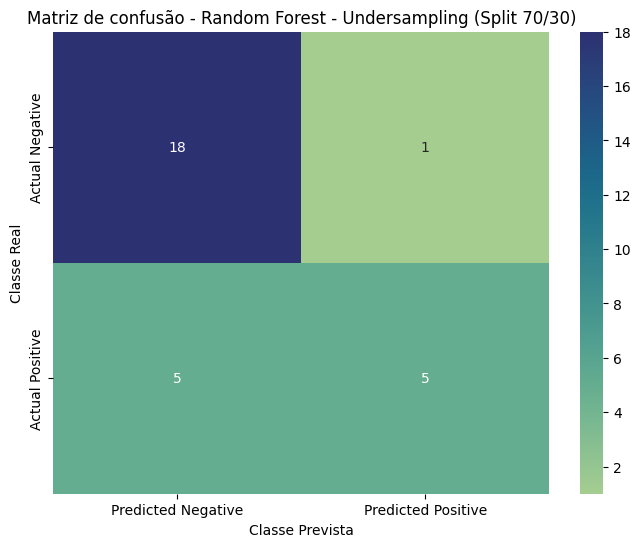

In [72]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_RF_under_70_30, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Random Forest - Undersampling (Split 70/30)")

# Mostrar o gráfico
plt.show()

##### 4.1.2.2. - Cross-Validation

In [73]:
#(df_orto_under_X, df_orto_under_y)
# Aplicação do modelo com Cross-Validation
clf_RF_under_CV = RandomForestClassifier(random_state=42)
y_pred_RF_under_CV = cross_val_predict(clf_RF_under_CV, df_orto_under_X, df_orto_under_y, cv=5)

# Avaliação
conf_mtx_RF_under_CV = confusion_matrix(df_orto_under_y, y_pred_RF_under_CV)
print("Matriz de Confusão:")
print(conf_mtx_RF_under_CV)

# Gerar relatório de classificação
report_RF_under_CV = classification_report(df_orto_under_y, y_pred_RF_under_CV, digits=4, output_dict=True)
print(classification_report(df_orto_under_y, y_pred_RF_under_CV, digits=4))

# Calcular valor da AUC diretamente das previsões
auc_RF_under_CV = roc_auc_score(df_orto_under_y, y_pred_RF_under_CV)
print("AUC:", auc_RF_under_CV)

# Converter o dicionário para DataFrame e adicionar AUC diretamente como uma coluna
report_df_RF_under_CV = pd.DataFrame(report_RF_under_CV).transpose()
report_df_RF_under_CV['AUC'] = auc_RF_under_CV  # Adicionar AUC diretamente

# Criar DataFrame para a matriz de confusão
conf_matrix_df_RF_under_CV = pd.DataFrame(conf_mtx_RF_under_CV,
                                          index=['Actual Negative', 'Actual Positive'],
                                          columns=['Predicted Negative', 'Predicted Positive'])

# Exportar resultados
with pd.ExcelWriter('Proj-Dados/Under-RF-classification-report_CV.xlsx') as writer:
    report_df_RF_under_CV.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_RF_under_CV.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")


Matriz de Confusão:
[[57 10]
 [16 13]]
              precision    recall  f1-score   support

           0     0.7808    0.8507    0.8143        67
           1     0.5652    0.4483    0.5000        29

    accuracy                         0.7292        96
   macro avg     0.6730    0.6495    0.6571        96
weighted avg     0.7157    0.7292    0.7193        96

AUC: 0.649511065362841
Results exported to Excel successfully!


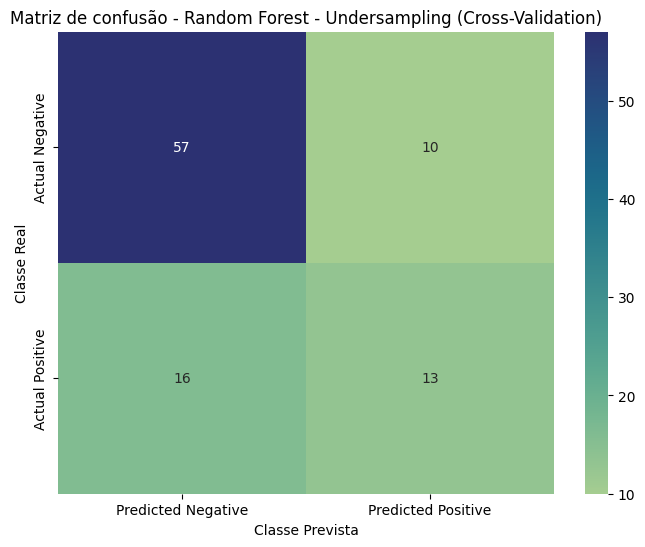

In [74]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_RF_under_CV, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Random Forest - Undersampling (Cross-Validation)")

# Mostrar o gráfico
plt.show()

#### 4.1.3. Para o dataframe oversampling

##### 4.1.3.1. Split 70/30

In [75]:
# (df_orto_over_X_train, df_orto_over_X_test, df_orto_over_y_train, df_orto_over_y_test)

# Configuração e treino do modelo Random Forest no dataset oversampled
clf_RF_over_70_30 = RandomForestClassifier(random_state=42)
clf_RF_over_70_30.fit(df_orto_over_X_train, df_orto_over_y_train)

# Previsões
y_pred_RF_over_70_30 = clf_RF_over_70_30.predict(df_orto_over_X_test)

# Avaliação
conf_mtx_RF_over_70_30 = confusion_matrix(df_orto_over_y_test, y_pred_RF_over_70_30)
report_RF_over_70_30 = classification_report(df_orto_over_y_test, y_pred_RF_over_70_30, digits=4, output_dict=True)
auc_RF_over_70_30 = roc_auc_score(df_orto_over_y_test, y_pred_RF_over_70_30)

# Converter o relatório para DataFrame e adicionar AUC
report_df_RF_over_70_30 = pd.DataFrame(report_RF_over_70_30).transpose()
report_df_RF_over_70_30['AUC'] = auc_RF_over_70_30

# Criar DataFrame para a matriz de confusão
conf_matrix_df_RF_over_70_30 = pd.DataFrame(conf_mtx_RF_over_70_30,
                                            index=['Actual Negative', 'Actual Positive'],
                                            columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df_RF_over_70_30)
# Exportar resultados usando ExcelWriter
with pd.ExcelWriter('Proj-Dados/Over-RF-classification-report_70_30.xlsx') as writer:
    report_df_RF_over_70_30.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_RF_over_70_30.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_RF_over_70_30)


                 Predicted Negative  Predicted Positive
Actual Negative                  68                   5
Actual Positive                   7                  38
Results exported to Excel successfully!
              precision    recall  f1-score     support       AUC
0              0.906667  0.931507  0.918919   73.000000  0.887976
1              0.883721  0.844444  0.863636   45.000000  0.887976
accuracy       0.898305  0.898305  0.898305    0.898305  0.887976
macro avg      0.895194  0.887976  0.891278  118.000000  0.887976
weighted avg   0.897916  0.898305  0.897837  118.000000  0.887976


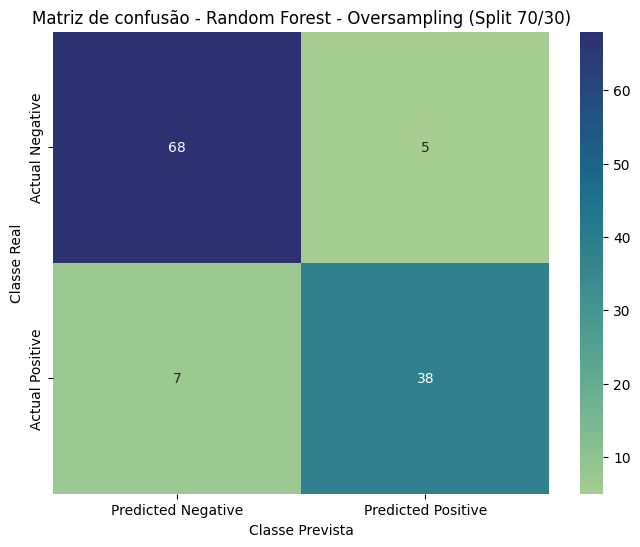

In [76]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_RF_over_70_30, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Random Forest - Oversampling (Split 70/30)")

# Mostrar o gráfico
plt.show()

##### 4.1.3.2. - Cross-Validation

In [77]:
#(df_orto_over_X, df_orto_over_y)
# Aplicação do modelo com Cross-Validation para o dataframe oversampled
clf_RF_over_CV = RandomForestClassifier(random_state=42)
y_pred_RF_over_CV = cross_val_predict(clf_RF_over_CV, df_orto_over_X, df_orto_over_y, cv=5)

# Avaliação
conf_mtx_RF_over_CV = confusion_matrix(df_orto_over_y, y_pred_RF_over_CV)
report_RF_over_CV = classification_report(df_orto_over_y, y_pred_RF_over_CV, digits=4, output_dict=True)
auc_RF_over_CV = roc_auc_score(df_orto_over_y, y_pred_RF_over_CV)

# Converter o relatório para DataFrame e adicionar AUC diretamente como uma coluna
report_df_RF_over_CV = pd.DataFrame(report_RF_over_CV).transpose()
report_df_RF_over_CV['AUC'] = auc_RF_over_CV  # Adicionar AUC diretamente

# Criar DataFrame para a matriz de confusão
conf_matrix_df_RF_over_CV = pd.DataFrame(conf_mtx_RF_over_CV,
                                         index=['Actual Negative', 'Actual Positive'],
                                         columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df_RF_over_CV)

# Exportar resultados usando ExcelWriter
with pd.ExcelWriter('Proj-Dados/Over-RF-classification-report_CV.xlsx') as writer:
    report_df_RF_over_CV.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_RF_over_CV.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_RF_over_CV)


                 Predicted Negative  Predicted Positive
Actual Negative                 223                  13
Actual Positive                  17                 140
Results exported to Excel successfully!
              precision    recall  f1-score     support       AUC
0              0.929167  0.944915  0.936975  236.000000  0.918317
1              0.915033  0.891720  0.903226  157.000000  0.918317
accuracy       0.923664  0.923664  0.923664    0.923664  0.918317
macro avg      0.922100  0.918317  0.920100  393.000000  0.918317
weighted avg   0.923520  0.923664  0.923492  393.000000  0.918317


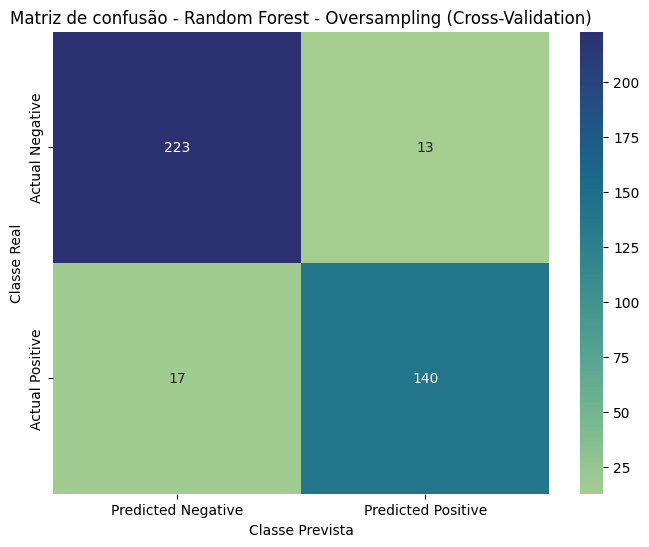

In [78]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_RF_over_CV, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Random Forest - Oversampling (Cross-Validation)")

# Mostrar o gráfico
plt.show()

### 4.2. Decision Tree


#### 4.2.1. Para o dataframe original 

##### 4.2.1.1. Split 70/30

In [79]:
#(df_orto_X_train, df_orto_X_test, df_orto_y_train, df_orto_y_test)
# Configuração e treino do modelo Decision Tree no dataset original
clf_DT_orig_70_30 = DecisionTreeClassifier(random_state=42)
clf_DT_orig_70_30.fit(df_orto_X_train, df_orto_y_train)

# Previsões
y_pred_DT_orig_70_30 = clf_DT_orig_70_30.predict(df_orto_X_test)

In [80]:
# Avaliação
conf_mtx_DT_orig_70_30 = confusion_matrix(df_orto_y_test, y_pred_DT_orig_70_30)
report_DT_orig_70_30 = classification_report(df_orto_y_test, y_pred_DT_orig_70_30, digits=4, output_dict=True)
auc_DT_orig_70_30 = roc_auc_score(df_orto_y_test, y_pred_DT_orig_70_30)

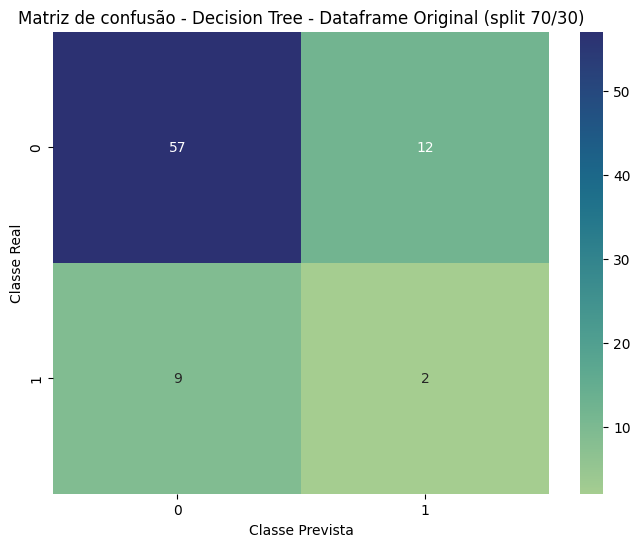

In [81]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_mtx_DT_orig_70_30, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Decision Tree - Dataframe Original (split 70/30)")

# Mostrar o gráfico
plt.show()

In [82]:
# Converter o relatório para DataFrame, transpor e adicionar AUC
report_df_DT_orig_70_30 = pd.DataFrame(report_DT_orig_70_30).transpose()
report_df_DT_orig_70_30['AUC'] = auc_DT_orig_70_30

# Criar DataFrame para a matriz de confusão
conf_matrix_df_DT_orig_70_30 = pd.DataFrame(conf_mtx_DT_orig_70_30,
                                            index=['Actual Negative', 'Actual Positive'],
                                            columns=['Predicted Negative', 'Predicted Positive'])

print(conf_matrix_df_DT_orig_70_30)
# Exportar resultados usando ExcelWriter
with pd.ExcelWriter('Proj-Dados/Orig-DT-classification-report_70_30.xlsx') as writer:
    report_df_DT_orig_70_30.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_DT_orig_70_30.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_DT_orig_70_30)

                 Predicted Negative  Predicted Positive
Actual Negative                  57                  12
Actual Positive                   9                   2
Results exported to Excel successfully!
              precision    recall  f1-score  support       AUC
0              0.863636  0.826087  0.844444  69.0000  0.503953
1              0.142857  0.181818  0.160000  11.0000  0.503953
accuracy       0.737500  0.737500  0.737500   0.7375  0.503953
macro avg      0.503247  0.503953  0.502222  80.0000  0.503953
weighted avg   0.764529  0.737500  0.750333  80.0000  0.503953


##### 4.2.1.2. Cross-Validation

In [83]:
#(df_orto_y,df_orto_X)
# Aplicação do modelo com Cross-Validation para o dataset original
y_pred_DT_orig_CV = cross_val_predict(DecisionTreeClassifier(random_state=42), df_orto_X, df_orto_y, cv=5)

# Avaliação
conf_mtx_DT_orig_CV = confusion_matrix(df_orto_y, y_pred_DT_orig_CV)
report_DT_orig_CV = classification_report(df_orto_y, y_pred_DT_orig_CV, digits=4, output_dict=True)
auc_DT_orig_CV = roc_auc_score(df_orto_y, y_pred_DT_orig_CV)

# Converter o relatório para DataFrame e adicionar AUC diretamente como uma coluna
report_df_DT_orig_CV = pd.DataFrame(report_DT_orig_CV).transpose()
report_df_DT_orig_CV['AUC'] = auc_DT_orig_CV  # Adicionar AUC diretamente

# Criar DataFrame para a matriz de confusão
conf_matrix_df_DT_orig_CV = pd.DataFrame(conf_mtx_DT_orig_CV,
                                         index=['Actual Negative', 'Actual Positive'],
                                         columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df_DT_orig_CV)

# Exportar resultados usando ExcelWriter
with pd.ExcelWriter('Proj-Dados/Orig-DT-classification-report_CV.xlsx') as writer:
    report_df_DT_orig_CV.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_DT_orig_CV.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")



                 Predicted Negative  Predicted Positive
Actual Negative                 207                  29
Actual Positive                  22                   7
Results exported to Excel successfully!


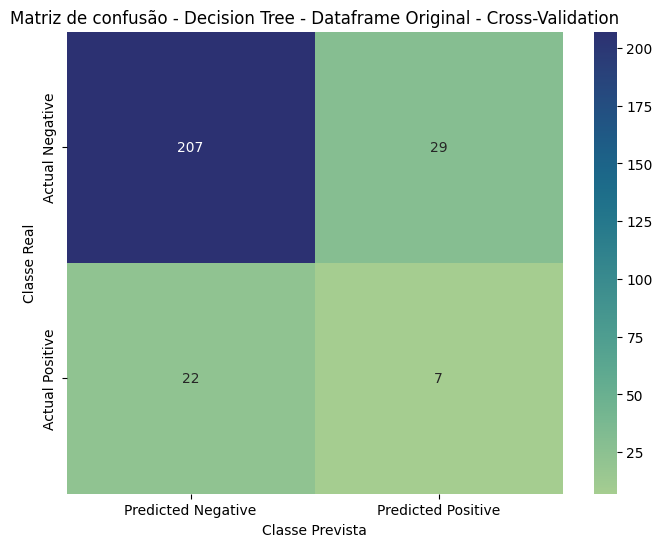

In [84]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_DT_orig_CV, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Decision Tree - Dataframe Original - Cross-Validation")

# Mostrar o gráfico
plt.show()

#### 4.2.2 Para o dataframe undersampling

##### 4.2.2.1 - Split 70/30

In [85]:
#(df_orto_under_X_train, df_orto_under_X_test, df_orto_under_y_train, df_orto_under_y_test)
# Treinar modelo de árvore de decisão no dataset de undersampling
clf_DT_under_70_30 = DecisionTreeClassifier(random_state=42)
clf_DT_under_70_30.fit(df_orto_under_X_train, df_orto_under_y_train)

# Predição no conjunto de teste
y_pred_DT_under_70_30 = clf_DT_under_70_30.predict(df_orto_under_X_test)

# Geração do relatório de classificação
report_DT_under_70_30 = classification_report(df_orto_under_y_test, y_pred_DT_under_70_30, digits=4, output_dict=True)

# Cálculo da AUC
auc_DT_under_70_30 = roc_auc_score(df_orto_under_y_test, y_pred_DT_under_70_30)

# Criar DataFrame para a matriz de confusão
conf_matrix_df_DT_under_70_30 = pd.DataFrame(confusion_matrix(df_orto_under_y_test, y_pred_DT_under_70_30),
                                             index=['Actual Negative', 'Actual Positive'],
                                             columns=['Predicted Negative', 'Predicted Positive'])

print(conf_matrix_df_DT_under_70_30)

# Criar DataFrame para o relatório de classificação e adicionar AUC
report_df_DT_under_70_30 = pd.DataFrame(report_DT_under_70_30).transpose()
report_df_DT_under_70_30['AUC'] = auc_DT_under_70_30


# Exportar resultados
with pd.ExcelWriter('Proj-Dados/Under-DT-classification-report_70_30.xlsx') as writer:
    report_df_DT_under_70_30.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_DT_under_70_30.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_RF_under_70_30)


                 Predicted Negative  Predicted Positive
Actual Negative                  15                   4
Actual Positive                   5                   5
Results exported to Excel successfully!
              precision    recall  f1-score    support       AUC
0              0.782609  0.947368  0.857143  19.000000  0.723684
1              0.833333  0.500000  0.625000  10.000000  0.723684
accuracy       0.793103  0.793103  0.793103   0.793103  0.723684
macro avg      0.807971  0.723684  0.741071  29.000000  0.723684
weighted avg   0.800100  0.793103  0.777094  29.000000  0.723684


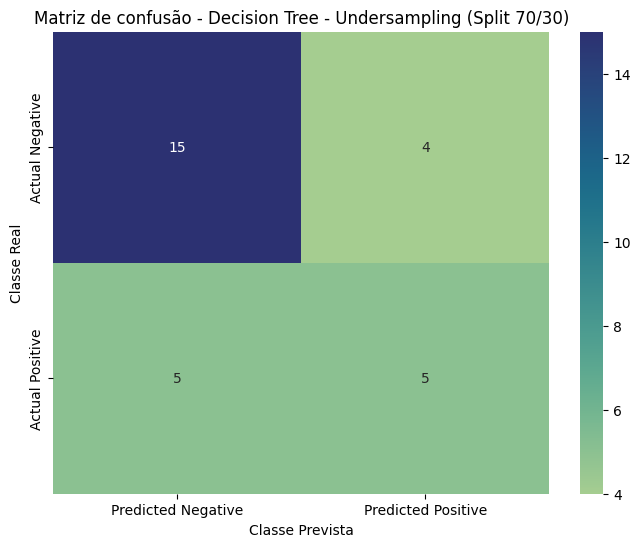

In [86]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_DT_under_70_30, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Decision Tree - Undersampling (Split 70/30)")

# Mostrar o gráfico
plt.show()


##### 4.2.2.2 - Cross-Validation

In [87]:
#(df_orto_under_y,df_orto_under_X)
# Aplicação do modelo com Cross-Validation para o dataset de undersampling
y_pred_DT_under_CV = cross_val_predict(DecisionTreeClassifier(random_state=42), df_orto_under_X, df_orto_under_y, cv=5)

# Avaliação
conf_mtx_DT_under_CV = confusion_matrix(df_orto_under_y, y_pred_DT_under_CV)
report_DT_under_CV = classification_report(df_orto_under_y, y_pred_DT_under_CV, digits=4, output_dict=True)
auc_DT_under_CV = roc_auc_score(df_orto_under_y, y_pred_DT_under_CV)

# Converter o relatório para DataFrame e adicionar AUC diretamente como uma coluna
report_df_DT_under_CV = pd.DataFrame(report_DT_under_CV).transpose()
report_df_DT_under_CV['AUC'] = auc_DT_under_CV  # Adicionar AUC diretamente

# Criar DataFrame para a matriz de confusão
conf_matrix_df_DT_under_CV = pd.DataFrame(conf_mtx_DT_under_CV,
                                          index=['Actual Negative', 'Actual Positive'],
                                          columns=['Predicted Negative', 'Predicted Positive'])

# Exportar resultados usando ExcelWriter
with pd.ExcelWriter('Proj-Dados/Under-DT-classification-report_CV.xlsx') as writer:
    report_df_DT_under_CV.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_DT_under_CV.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_DT_under_CV)



Results exported to Excel successfully!
              precision    recall  f1-score    support       AUC
0              0.761194  0.761194  0.761194  67.000000  0.604735
1              0.448276  0.448276  0.448276  29.000000  0.604735
accuracy       0.666667  0.666667  0.666667   0.666667  0.604735
macro avg      0.604735  0.604735  0.604735  96.000000  0.604735
weighted avg   0.666667  0.666667  0.666667  96.000000  0.604735


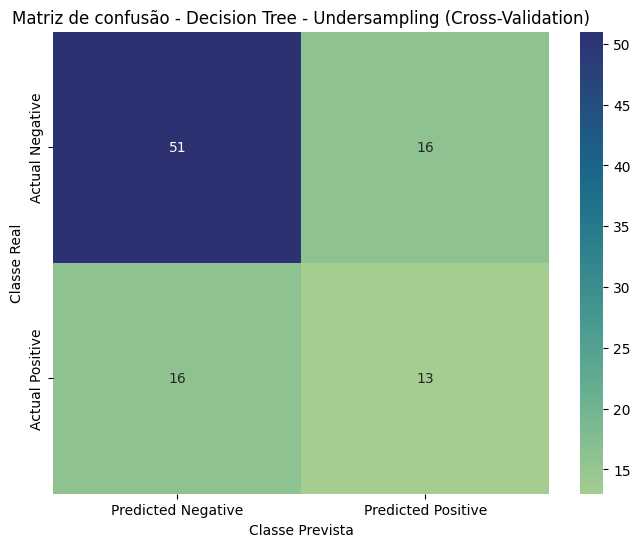

In [88]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_DT_under_CV, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Decision Tree - Undersampling (Cross-Validation)")

# Mostrar o gráfico
plt.show()


#### 4.2.3 Para o dataframe oversampling

##### 4.2.3.1 Decision Tree - split 70/30

In [89]:
#(df_orto_over_X_train, df_orto_over_X_test, df_orto_over_y_train, df_orto_over_y_test)
# Configuração e treino do modelo Decision Tree no dataset oversampled
clf_DT_over_70_30 = DecisionTreeClassifier(random_state=42)
clf_DT_over_70_30.fit(df_orto_over_X_train, df_orto_over_y_train)

# Previsões
y_pred_DT_over_70_30 = clf_DT_over_70_30.predict(df_orto_over_X_test)

# Geração do relatório de classificação
report_DT_over_70_30 = classification_report(df_orto_over_y_test, y_pred_DT_over_70_30, digits=4, output_dict=True)

# Cálculo da AUC
auc_DT_over_70_30 = roc_auc_score(df_orto_over_y_test, y_pred_DT_over_70_30)

# Criar DataFrame para a matriz de confusão
conf_matrix_df_DT_over_70_30 = pd.DataFrame(confusion_matrix(df_orto_over_y_test, y_pred_DT_over_70_30),
                                             index=['Actual Negative', 'Actual Positive'],
                                             columns=['Predicted Negative', 'Predicted Positive'])

print(conf_matrix_df_DT_over_70_30)

# Criar DataFrame para o relatório de classificação e adicionar AUC
report_df_DT_over_70_30 = pd.DataFrame(report_DT_over_70_30).transpose()
report_df_DT_over_70_30['AUC'] = auc_DT_over_70_30

# Exportar resultados
with pd.ExcelWriter('Proj-Dados/Over-DT-classification-report_70_30.xlsx') as writer:
    report_df_DT_over_70_30.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_DT_over_70_30.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_DT_over_70_30)


                 Predicted Negative  Predicted Positive
Actual Negative                  60                  13
Actual Positive                   4                  41
Results exported to Excel successfully!
              precision    recall  f1-score     support       AUC
0              0.937500  0.821918  0.875912   73.000000  0.866514
1              0.759259  0.911111  0.828283   45.000000  0.866514
accuracy       0.855932  0.855932  0.855932    0.855932  0.866514
macro avg      0.848380  0.866514  0.852098  118.000000  0.866514
weighted avg   0.869527  0.855932  0.857749  118.000000  0.866514


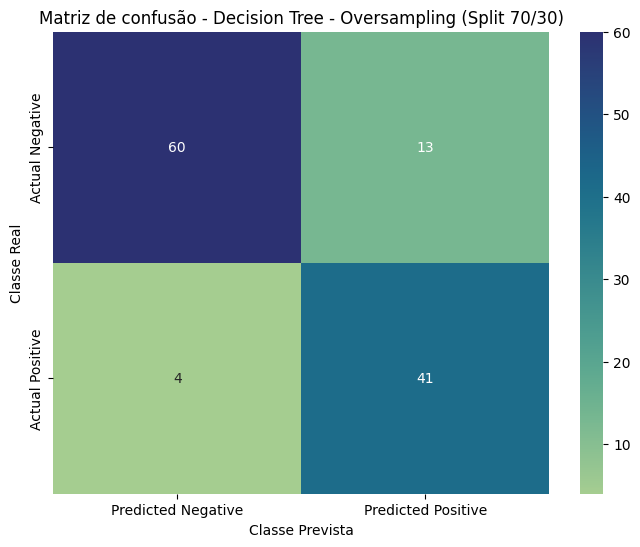

In [90]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_DT_over_70_30, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Decision Tree - Oversampling (Split 70/30)")

# Mostrar o gráfico
plt.show()

##### 4.2.3.2 Decision Tree - Cross-Validation

In [91]:
#(df_orto_over_y,df_orto_over_X)
# Aplicação do modelo com Cross-Validation para o dataset oversampled
y_pred_DT_over_CV = cross_val_predict(DecisionTreeClassifier(random_state=42), df_orto_over_X, df_orto_over_y, cv=5)

# Avaliação
conf_mtx_DT_over_CV = confusion_matrix(df_orto_over_y, y_pred_DT_over_CV)
report_DT_over_CV = classification_report(df_orto_over_y, y_pred_DT_over_CV, digits=4, output_dict=True)
auc_DT_over_CV = roc_auc_score(df_orto_over_y, y_pred_DT_over_CV)

# Converter o relatório para DataFrame e adicionar AUC diretamente como uma coluna
report_df_DT_over_CV = pd.DataFrame(report_DT_over_CV).transpose()
report_df_DT_over_CV['AUC'] = auc_DT_over_CV  # Adicionar AUC diretamente

# Criar DataFrame para a matriz de confusão
conf_matrix_df_DT_over_CV = pd.DataFrame(conf_mtx_DT_over_CV,
                                         index=['Actual Negative', 'Actual Positive'],
                                         columns=['Predicted Negative', 'Predicted Positive'])

# Exportar resultados usando ExcelWriter
with pd.ExcelWriter('Proj-Dados/Over-DT-classification-report_CV.xlsx') as writer:
    report_df_DT_over_CV.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_DT_over_CV.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_DT_over_CV)


Results exported to Excel successfully!
              precision    recall  f1-score     support       AUC
0              0.899543  0.834746  0.865934  236.000000  0.847309
1              0.775862  0.859873  0.815710  157.000000  0.847309
accuracy       0.844784  0.844784  0.844784    0.844784  0.847309
macro avg      0.837703  0.847309  0.840822  393.000000  0.847309
weighted avg   0.850134  0.844784  0.845870  393.000000  0.847309


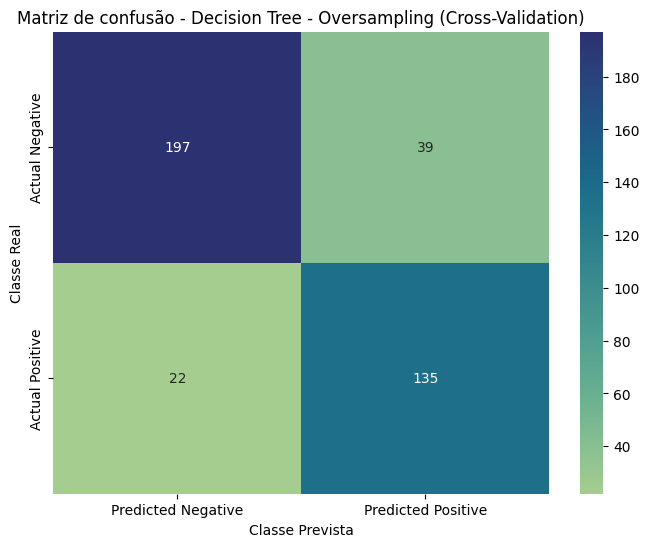

In [92]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_DT_over_CV, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores


# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Decision Tree - Oversampling (Cross-Validation)")

# Mostrar o gráfico
plt.show()


### 4.3. Regressão Logística

#### 4.3.1 Dataframe Original 

##### 4.3.1.1. Split 70/30

In [93]:
#(df_orto_X_train, df_orto_X_test, df_orto_y_train, df_orto_y_test)
# Configuração e treino do modelo de Regressão Logística
clf_LR_orig_70_30 = LogisticRegression(random_state=42, solver='liblinear', max_iter=5000)
clf_LR_orig_70_30.fit(df_orto_X_train, df_orto_y_train)

# Previsões
y_pred_LR_orig_70_30 = clf_LR_orig_70_30.predict(df_orto_X_test)

# Obter matriz de confusão
conf_mtx_LR_orig_70_30 = confusion_matrix(df_orto_y_test, y_pred_LR_orig_70_30)
print("Matriz de Confusão:")
print(conf_mtx_LR_orig_70_30)

# Avaliação/Métricas do Modelo
report_LR_orig_70_30 = classification_report(df_orto_y_test, y_pred_LR_orig_70_30, digits=4, output_dict=True)
print(classification_report(df_orto_y_test, y_pred_LR_orig_70_30, digits=4))

# Calcular valor da AUC
auc_LR_orig_70_30 = roc_auc_score(df_orto_y_test, y_pred_LR_orig_70_30)
print("AUC:", auc_LR_orig_70_30)

# Converter relatório para DataFrame e adicionar AUC diretamente como uma coluna
report_df_LR_orig_70_30 = pd.DataFrame(report_LR_orig_70_30).transpose()
report_df_LR_orig_70_30['AUC'] = auc_LR_orig_70_30  # Adicionar AUC diretamente

# Criar DataFrame para a matriz de confusão
conf_matrix_df_LR_orig_70_30 = pd.DataFrame(conf_mtx_LR_orig_70_30,
                                               index=['Actual Negative', 'Actual Positive'],
                                               columns=['Predicted Negative', 'Predicted Positive'])

# Exportar para Excel
with pd.ExcelWriter('Proj-Dados/Orig-LR-classification-report_70_30.xlsx') as writer:
    report_df_LR_orig_70_30.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_LR_orig_70_30.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_LR_orig_70_30)



Matriz de Confusão:
[[68  1]
 [10  1]]
              precision    recall  f1-score   support

           0     0.8718    0.9855    0.9252        69
           1     0.5000    0.0909    0.1538        11

    accuracy                         0.8625        80
   macro avg     0.6859    0.5382    0.5395        80
weighted avg     0.8207    0.8625    0.8191        80

AUC: 0.5382081686429513
Results exported to Excel successfully!
              precision    recall  f1-score  support       AUC
0              0.871795  0.985507  0.925170  69.0000  0.538208
1              0.500000  0.090909  0.153846  11.0000  0.538208
accuracy       0.862500  0.862500  0.862500   0.8625  0.538208
macro avg      0.685897  0.538208  0.539508  80.0000  0.538208
weighted avg   0.820673  0.862500  0.819113  80.0000  0.538208


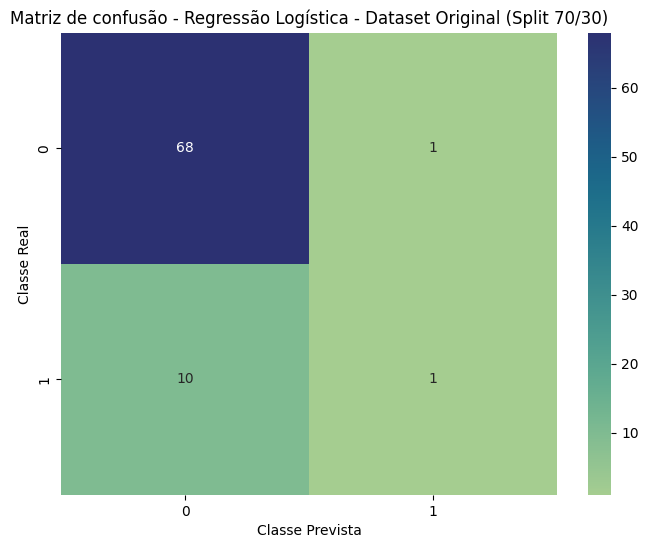

In [94]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_mtx_LR_orig_70_30, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores


# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Regressão Logística - Dataset Original (Split 70/30)")

# Mostrar o gráfico
plt.show()

##### 4.3.2.1. Cross-Validation

In [95]:
#(df_orto_y,df_orto_X)
# Aplicação do modelo com Cross-Validation para o dataset original, com aumento do número de iterações
clf_LR_orig_CV = LogisticRegression(random_state=42, solver='liblinear',  max_iter=5000)
y_pred_LR_orig_CV = cross_val_predict(clf_LR_orig_CV, df_orto_X, df_orto_y, cv=5)

# Avaliação
conf_mtx_LR_orig_CV = confusion_matrix(df_orto_y, y_pred_LR_orig_CV)
report_LR_orig_CV = classification_report(df_orto_y, y_pred_LR_orig_CV, digits=4, output_dict=True)
auc_LR_orig_CV = roc_auc_score(df_orto_y, y_pred_LR_orig_CV)

# Converter o relatório para DataFrame e adicionar AUC diretamente como uma coluna
report_df_LR_orig_CV = pd.DataFrame(report_LR_orig_CV).transpose()
report_df_LR_orig_CV['AUC'] = auc_LR_orig_CV  # Adicionar AUC diretamente

# Criar DataFrame para a matriz de confusão
conf_matrix_df_LR_orig_CV = pd.DataFrame(conf_mtx_LR_orig_CV,
                                         index=['Actual Negative', 'Actual Positive'],
                                         columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df_DT_orig_CV)

# Exportar resultados usando ExcelWriter
with pd.ExcelWriter('Proj-Dados/Orig-LR-classification-report_CV.xlsx') as writer:
    report_df_LR_orig_CV.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_LR_orig_CV.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_LR_orig_CV)


                 Predicted Negative  Predicted Positive
Actual Negative                 207                  29
Actual Positive                  22                   7
Results exported to Excel successfully!
              precision    recall  f1-score     support       AUC
0              0.894942  0.974576  0.933063  236.000000  0.521771
1              0.250000  0.068966  0.108108   29.000000  0.521771
accuracy       0.875472  0.875472  0.875472    0.875472  0.521771
macro avg      0.572471  0.521771  0.520585  265.000000  0.521771
weighted avg   0.824363  0.875472  0.842785  265.000000  0.521771


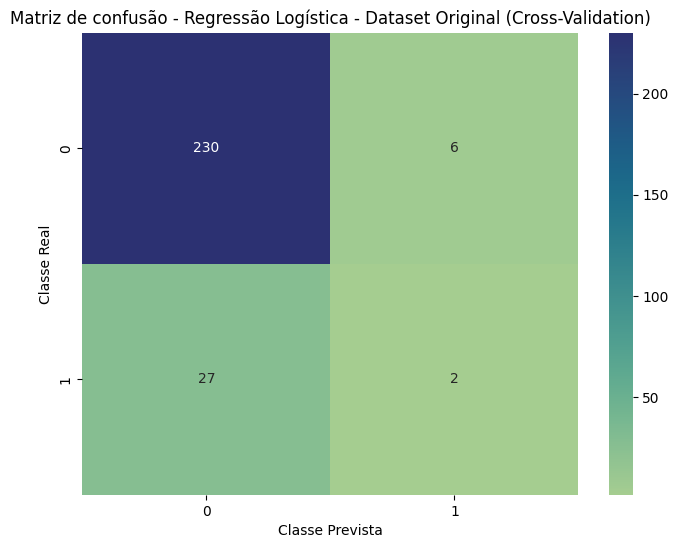

In [96]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_mtx_LR_orig_CV, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores


# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Regressão Logística - Dataset Original (Cross-Validation)")

# Mostrar o gráfico
plt.show()

#### 4.3.2. Para o dataframe undersampling 

##### 4.3.2.1 Split 70/30

In [97]:
# (df_orto_under_X_train, df_orto_under_X_test, df_orto_under_y_train, df_orto_under_y_test)

# Configuração e treino do modelo de Regressão Logística no dataset de undersampling
clf_LR_under_70_30 = LogisticRegression(random_state=42, solver='liblinear', max_iter=5000)
clf_LR_under_70_30.fit(df_orto_under_X_train, df_orto_under_y_train)

# Previsões
y_pred_LR_under_70_30 = clf_LR_under_70_30.predict(df_orto_under_X_test)

# Avaliação
conf_mtx_LR_under_70_30 = confusion_matrix(df_orto_under_y_test, y_pred_LR_under_70_30)
report_LR_under_70_30 = classification_report(df_orto_under_y_test, y_pred_LR_under_70_30, digits=4, output_dict=True)
auc_LR_under_70_30 = roc_auc_score(df_orto_under_y_test, y_pred_LR_under_70_30)

# Exportar resultados
report_df_LR_under_70_30 = pd.DataFrame(report_LR_under_70_30).transpose()
report_df_LR_under_70_30['AUC'] = auc_LR_under_70_30
print(report_df_LR_under_70_30)

# Criar DataFrame para a matriz de confusão
conf_matrix_df_LR_under_70_30 = pd.DataFrame(conf_mtx_LR_under_70_30,
                                             index=['Actual Negative', 'Actual Positive'],
                                             columns=['Predicted Negative', 'Predicted Positive'])

# Exportar resultados
with pd.ExcelWriter('Proj-Dados/Under-LR-classification-report_70_30.xlsx') as writer:
    report_df_LR_under_70_30.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_LR_under_70_30.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_LR_under_70_30)

              precision    recall  f1-score    support  AUC
0              0.826087  1.000000  0.904762  19.000000  0.8
1              1.000000  0.600000  0.750000  10.000000  0.8
accuracy       0.862069  0.862069  0.862069   0.862069  0.8
macro avg      0.913043  0.800000  0.827381  29.000000  0.8
weighted avg   0.886057  0.862069  0.851396  29.000000  0.8
Results exported to Excel successfully!
              precision    recall  f1-score    support  AUC
0              0.826087  1.000000  0.904762  19.000000  0.8
1              1.000000  0.600000  0.750000  10.000000  0.8
accuracy       0.862069  0.862069  0.862069   0.862069  0.8
macro avg      0.913043  0.800000  0.827381  29.000000  0.8
weighted avg   0.886057  0.862069  0.851396  29.000000  0.8


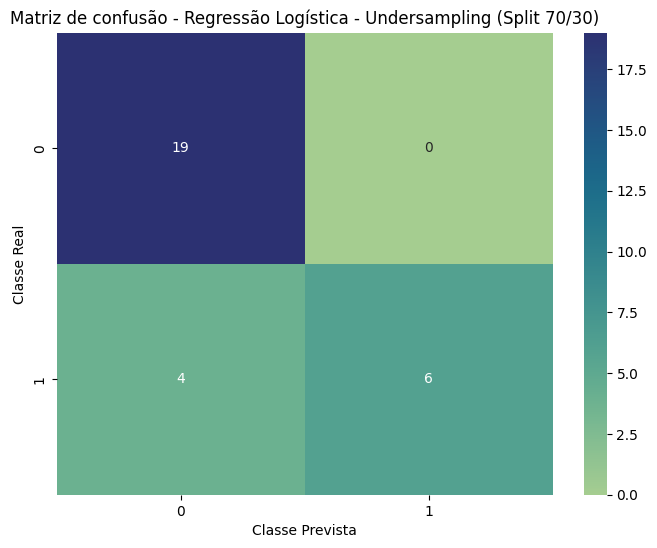

In [98]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_mtx_LR_under_70_30, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores


# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Regressão Logística - Undersampling (Split 70/30)")

# Mostrar o gráfico
plt.show()

##### 4.3.2.2. Cross-Validation

In [99]:
#(df_orto_under_X, df_orto_under_y)
# Aplicação do modelo com Cross-Validation para o dataset de undersampling
clf_LR_under_CV = LogisticRegression(random_state=42, max_iter=5000, solver='liblinear')
y_pred_LR_under_CV = cross_val_predict(clf_LR_under_CV, df_orto_under_X, df_orto_under_y, cv=5)

# Avaliação
conf_mtx_LR_under_CV = confusion_matrix(df_orto_under_y, y_pred_LR_under_CV)
print("Matriz de Confusão:")
print(conf_mtx_LR_under_CV)

# Gerar relatório de classificação
report_LR_under_CV = classification_report(df_orto_under_y, y_pred_LR_under_CV, digits=4, output_dict=True)
print(classification_report(df_orto_under_y, y_pred_LR_under_CV, digits=4))

# Calcular valor da AUC diretamente das previsões
auc_LR_under_CV = roc_auc_score(df_orto_under_y, y_pred_LR_under_CV)
print("AUC:", auc_RF_under_CV)

# Converter o dicionário para DataFrame e adicionar AUC diretamente como uma coluna
report_df_LR_under_CV = pd.DataFrame(report_LR_under_CV).transpose()
report_df_LR_under_CV['AUC'] = auc_LR_under_CV

# Criar DataFrame para a matriz de confusão
conf_matrix_df_LR_under_CV = pd.DataFrame(conf_mtx_LR_under_CV,
                                          index=['Actual Negative', 'Actual Positive'],
                                          columns=['Predicted Negative', 'Predicted Positive'])

# Exportar resultados
with pd.ExcelWriter('Proj-Dados/Under-LR-classification-report_CV.xlsx') as writer:
    report_df_LR_under_CV.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_LR_under_CV.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")


Matriz de Confusão:
[[57 10]
 [14 15]]
              precision    recall  f1-score   support

           0     0.8028    0.8507    0.8261        67
           1     0.6000    0.5172    0.5556        29

    accuracy                         0.7500        96
   macro avg     0.7014    0.6840    0.6908        96
weighted avg     0.7415    0.7500    0.7444        96

AUC: 0.649511065362841
Results exported to Excel successfully!


              precision    recall  f1-score    support  AUC
0              0.826087  1.000000  0.904762  19.000000  0.8
1              1.000000  0.600000  0.750000  10.000000  0.8
accuracy       0.862069  0.862069  0.862069   0.862069  0.8
macro avg      0.913043  0.800000  0.827381  29.000000  0.8
weighted avg   0.886057  0.862069  0.851396  29.000000  0.8


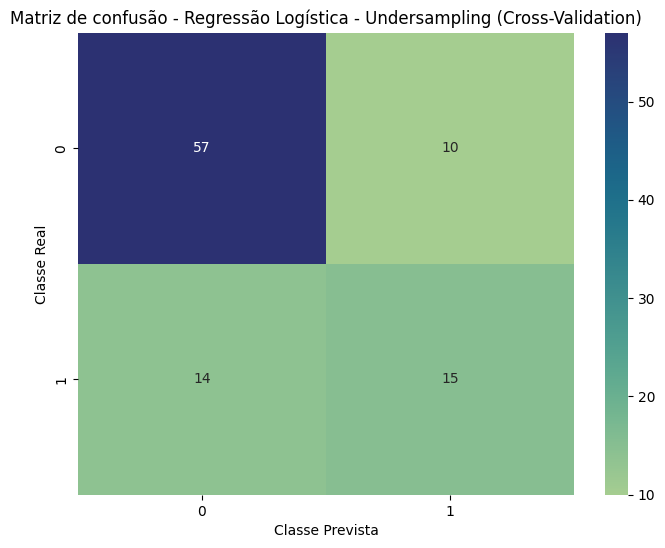

In [100]:
print(report_df_LR_under_70_30)
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_mtx_LR_under_CV, annot=True, fmt="d",
            cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Regressão Logística - Undersampling (Cross-Validation)")

# Mostrar o gráfico
plt.show()

#### 4.3.3. Para o dataframe oversampling 

##### 4.3.3.1. Split 70/30

In [101]:
# (df_orto_over_X_train, df_orto_over_X_test, df_orto_over_y_train, df_orto_over_y_test)

# Configuração e treino do modelo de Regressão Logística no dataset de oversampling
clf_LR_over_70_30 = LogisticRegression(random_state=42,solver='liblinear', max_iter=5000)
clf_LR_over_70_30.fit(df_orto_over_X_train, df_orto_over_y_train)

# Previsões
y_pred_LR_over_70_30 = clf_LR_over_70_30.predict(df_orto_over_X_test)

# Avaliação
conf_mtx_LR_over_70_30 = confusion_matrix(df_orto_over_y_test, y_pred_LR_over_70_30)
report_LR_over_70_30 = classification_report(df_orto_over_y_test, y_pred_LR_over_70_30, digits=4, output_dict=True)
auc_LR_over_70_30 = roc_auc_score(df_orto_over_y_test, y_pred_LR_over_70_30)

# Exportar resultados
report_df_LR_over_70_30 = pd.DataFrame(report_LR_over_70_30).transpose()
report_df_LR_over_70_30['AUC'] = auc_LR_over_70_30
report_df_LR_over_70_30.to_excel('Proj-Dados/Over-LR-classification-report_70_30.xlsx')

# Criar DataFrame para a matriz de confusão
conf_matrix_df_LR_over_70_30 = pd.DataFrame(conf_mtx_LR_over_70_30,
                                            index=['Actual Negative', 'Actual Positive'],
                                            columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df_LR_over_70_30)
# Exportar resultados usando ExcelWriter
with pd.ExcelWriter('Proj-Dados/Over-LR-classification-report_70_30.xlsx') as writer:
    report_df_LR_over_70_30.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_LR_over_70_30.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_LR_over_70_30)


                 Predicted Negative  Predicted Positive
Actual Negative                  66                   7
Actual Positive                   7                  38
Results exported to Excel successfully!
              precision    recall  f1-score     support       AUC
0              0.904110  0.904110  0.904110   73.000000  0.874277
1              0.844444  0.844444  0.844444   45.000000  0.874277
accuracy       0.881356  0.881356  0.881356    0.881356  0.874277
macro avg      0.874277  0.874277  0.874277  118.000000  0.874277
weighted avg   0.881356  0.881356  0.881356  118.000000  0.874277


              precision    recall  f1-score    support  AUC
0              0.826087  1.000000  0.904762  19.000000  0.8
1              1.000000  0.600000  0.750000  10.000000  0.8
accuracy       0.862069  0.862069  0.862069   0.862069  0.8
macro avg      0.913043  0.800000  0.827381  29.000000  0.8
weighted avg   0.886057  0.862069  0.851396  29.000000  0.8


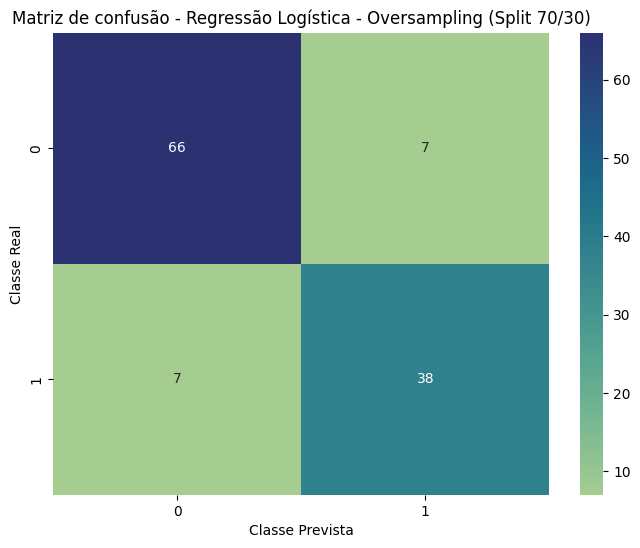

In [102]:
print(report_df_LR_under_70_30)
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_mtx_LR_over_70_30, annot=True, fmt="d",
            cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Regressão Logística - Oversampling (Split 70/30)")

# Mostrar o gráfico
plt.show()

##### 4.3.3.2. Cross-Validation

In [103]:
# Aplicação do modelo com Cross-Validation
y_pred_LR_over_CV = cross_val_predict(LogisticRegression(random_state=42, solver='liblinear', max_iter=5000), df_orto_over_X, df_orto_over_y, cv=5)

# Avaliação
print(classification_report(df_orto_over_y, y_pred_LR_over_CV, digits=4))

# Calcular valor da AUC
auc_LR_over_CV = roc_auc_score(df_orto_over_y, y_pred_LR_over_CV)
print("AUC:", auc_LR_over_CV)

# Converter o relatório de classificação para DataFrame
report_dict_LR_over_CV = classification_report(df_orto_over_y, y_pred_LR_over_CV, digits=4, output_dict=True)
report_df_LR_over_CV = pd.DataFrame(report_dict_LR_over_CV).transpose()

# Adicionar a AUC ao DataFrame
report_df_LR_over_CV['AUC'] = auc_LR_over_CV

# Calcular a matriz de confusão
conf_matrix_LR_over_CV = confusion_matrix(df_orto_over_y, y_pred_LR_over_CV)

# Criar DataFrame para a matriz de confusão
conf_matrix_df_LR_over_CV = pd.DataFrame(conf_matrix_LR_over_CV,
                                         index=['Actual Negative', 'Actual Positive'],
                                         columns=['Predicted Negative', 'Predicted Positive'])

# Exportar resultados usando ExcelWriter
with pd.ExcelWriter('Proj-Dados/Over-LR-classification-report_CV.xlsx') as writer:
    report_df_LR_over_CV.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_LR_over_CV.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_LR_over_CV)


              precision    recall  f1-score   support

           0     0.8955    0.8347    0.8640       236
           1     0.7746    0.8535    0.8121       157

    accuracy                         0.8422       393
   macro avg     0.8350    0.8441    0.8381       393
weighted avg     0.8472    0.8422    0.8433       393

AUC: 0.8441244737126201
Results exported to Excel successfully!
              precision    recall  f1-score     support       AUC
0              0.895455  0.834746  0.864035  236.000000  0.844124
1              0.774566  0.853503  0.812121  157.000000  0.844124
accuracy       0.842239  0.842239  0.842239    0.842239  0.844124
macro avg      0.835011  0.844124  0.838078  393.000000  0.844124
weighted avg   0.847161  0.842239  0.843296  393.000000  0.844124


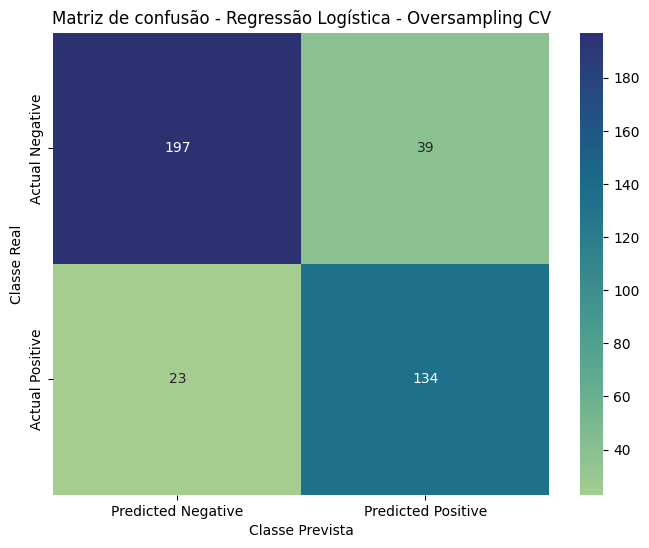

In [104]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_LR_over_CV, annot=True, fmt="d", cmap='crest')
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.title("Matriz de confusão - Regressão Logística - Oversampling CV")

# Mostrar o gráfico
plt.show()

# Evaluation

             Importance       Std
PM6_0      1.559322e-01  0.024910
Fle_0      4.237288e-02  0.009283
Peso       2.881356e-02  0.015718
Sexo       2.542373e-02  0.017776
EVA_0      2.372881e-02  0.006342
WAtotal_0  2.372881e-02  0.006342
Grupo_pre  2.203390e-02  0.024327
Idade      1.694915e-02  0.007580
WD_0       1.694915e-02  0.013129
IMC        1.694915e-02  0.015160
Altura_cm  3.389831e-03  0.013770
WR_0       2.220446e-17  0.005360


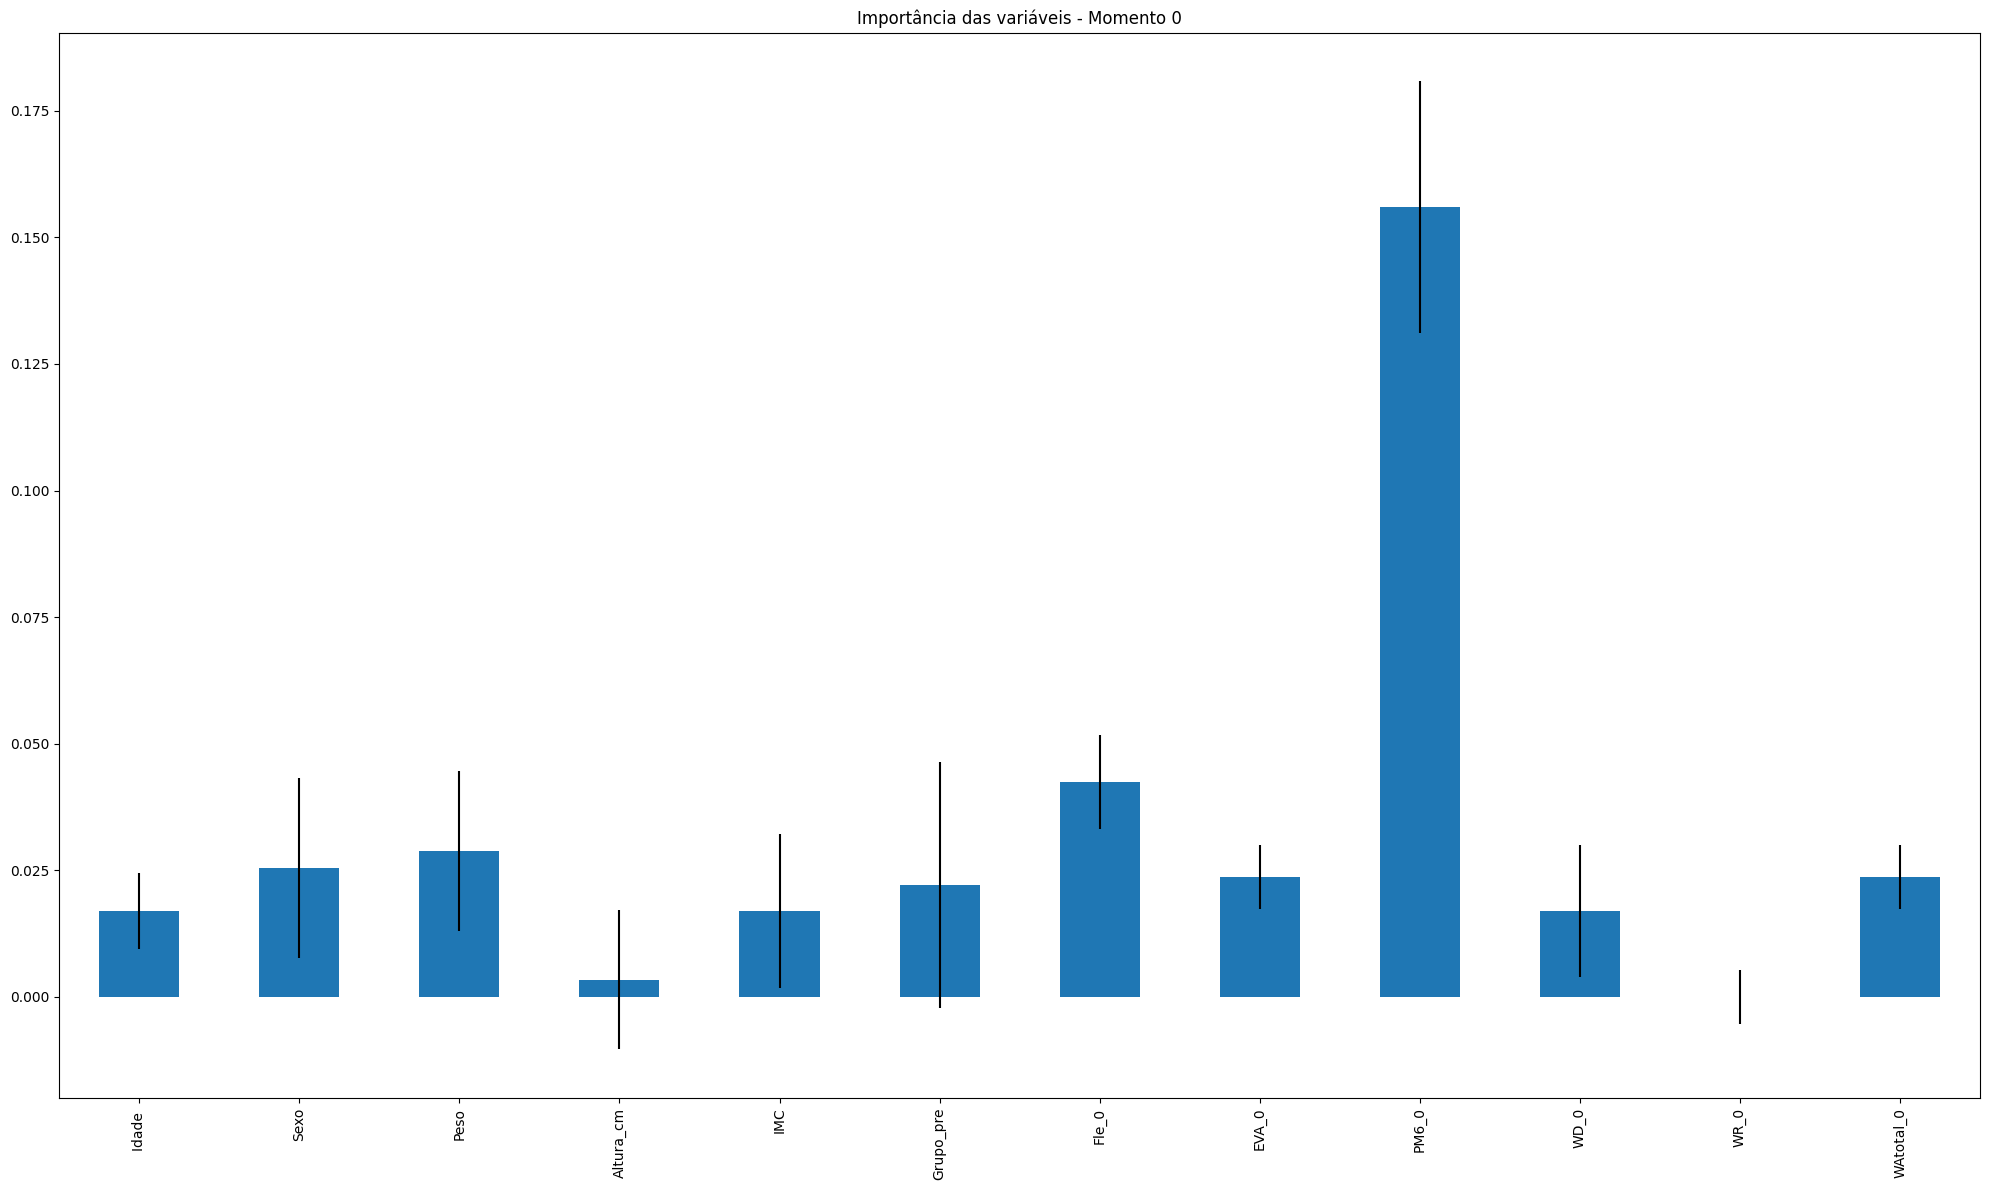

In [105]:
#Ver qual a importância das variáveis do modelo final escolhido
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

# (df_orto_over_X_train, df_orto_over_X_test, df_orto_over_y_train, df_orto_over_y_test)


perm_importance = permutation_importance(clf_RF_over_70_30,df_orto_over_X_test, df_orto_over_y_test, random_state=42) #calcular as importâncias

feature_names = df_orto_over_X_test.columns #guardar nome das variáveis

sorted_idx = perm_importance.importances_mean.argsort() #ordenar as importâncias

#criar tabela com as variáveis, importâncias e seus desvios-padrões
df_importances = pd.DataFrame({'Importance': perm_importance.importances_mean, 'Std': perm_importance.importances_std}, index=feature_names).sort_values('Importance',ascending=False)
print(df_importances)

#criar gráfico para importâncias
forest_importances = pd.Series(perm_importance.importances_mean, index=feature_names)
fig, ax = plt.subplots(figsize=(20, 12))
forest_importances.plot.bar(yerr=perm_importance.importances_std, ax=ax)
ax.set_title("Importância das variáveis - Momento 0")
fig.tight_layout()